In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")

Years

In [2]:
#Years we concerned with 
start_year=1990
end_year=2017
year_range = range(start_year, end_year+1) 

# Target Data - Salmon Survivals

In [3]:
#Read ZooPlanktonPerryData file
##obtain SalmonSurvivals_data
            #Take years less than or equal to 2017
                            #last row (year 2018) has only NaN


file_path = "../Data/ZooPlanktonPerryData.xlsx"
selected_sheet = "5. Salmon marine survivals"  
df = pd.read_excel(file_path, sheet_name=selected_sheet)
SalmonSurvivals_data = df[df["Ocean Entry Year"]<=2017]


#Rename the columns 
abbreviation_mapping = {
    'Ocean Entry Year': 'year',
    'Cowichan Chinook': 'Cow_Ch',
    'Harrison Chinook': 'Har_Ch',
    'Puntledge Chinook': 'Pun_Ch',
    'Big Qualicum Coho': 'BQ_Coho'
}

salmonSurvivals = SalmonSurvivals_data.rename(columns=abbreviation_mapping)


# List of salmon types 
year_column = 'year'
salmonTypes_List =  [col for col in salmonSurvivals.columns if col != year_column]

# Data Reads for Zooplankton Biomasses

In [4]:
#Read ZooPlanktonPerryData file

##obtain  plankBiomass_data   
###take the years less than 2017 
###we drop columns that do not give biomass of zooplanktons
file_path = "../Data/ZooPlanktonPerryData.xlsx"
selected_sheet = "1. Zooplankton Biomass data"  
df = pd.read_excel(file_path, sheet_name=selected_sheet)
df= df[df["yr"]<=2017]
plankBiomass_data=df.drop(columns=['key', 'survey', 'region', 'event', 'net', 'station', 'lon', 'lat', 'mon', 'day', 'time',  'twilight', 'net.type', 'diam.m', 'mesh.um', 'startz.m', 'endz.m','botz.m',
       'volfilt.m3'])

##  BiomassDefs      (if info on column names is needed)
selected_sheet = "2. Biomass data definitions"  
BiomassDefs = pd.read_excel(file_path, sheet_name=selected_sheet)

# Create a new DataFrame for averaged values
#Group by 'yr' and calculate the annual mean of Zooplanktons
#drop duplicates
#rename the columns for convenienve
#reset_index

plankBiomassMean = pd.DataFrame()

for column in plankBiomass_data.columns:
    if column in ['yr', 'region']:
        plankBiomassMean[column] = plankBiomass_data[column]
    else:
        name = 'Av_' + column
        plankBiomassMean[name] = plankBiomass_data.groupby('yr')[column].transform('mean')


plankBiomassMean.drop_duplicates(subset=['yr'], inplace=True)
plankBiomassMean.rename(columns={'yr': 'year', 'Av_Total.Biomass': 'Av_totalBiomass'},  inplace=True)
plankBiomassMean.reset_index(drop=True, inplace=True)

#Also create a DataFrame for Total Biomasses 
        #Total Biomasses is the last column of plankBiomassMean
totalBiomass_av = plankBiomassMean.iloc[:, [0, -1]]


### Obtained Data Frames

In [5]:
display(plankBiomassMean.head(3))
display(plankBiomassMean.tail(3))
display(plankBiomassMean.columns)
display(totalBiomass_av.head(3))
#Note: data of totalBiomass_av appears in plankBiomassMean

year  Av_AmphiGam  Av_AmphiHyp  Av_BenthicLarv  Av_CalCops.larg  \
0  1996     3.099832     1.324307        0.274767        13.213023   
1  1997     8.415328     1.458525        0.033581        24.451942   
2  1998     8.007227     3.214592        0.572927        12.494889   

   Av_CalCops.med  Av_CalCops.smal  Av_Cephalopoda  Av_Chaetognatha  \
0        9.285405         0.929795        0.015525         0.358527   
1        9.381715         0.810660        0.022965         1.561735   
2       11.405672         1.033331        0.053075         0.980033   

   Av_Cladocera  ...  Av_Natantia  Av_NonCalCops  Av_Ostracoda  Av_Other  \
0      0.000955  ...     0.718163       0.322313      2.674950  0.083352   
1      0.006467  ...     0.606682       0.358207      3.035919  0.041017   
2      0.010478  ...     0.637259       0.325437      3.960144  0.004294   

   Av_PolychaetPelagic  Av_Pteropods  Av_Repantia  Av_Scyphozoa  \
0             1.615180      0.324095     0.081970           0.0   
1             0.437920      0.482410     4.063566           0.0   
2             0.897803      2.674066     0.688282           0.0   

   Av_Siphonophorae  Av_totalBiomass  
0          0.531088        37.388238  
1          0.431464        71.212723  
2          0.202136       105.522363  

[3 rows x 26 columns]

year  Av_AmphiGam  Av_AmphiHyp  Av_BenthicLarv  Av_CalCops.larg  \
19  2015     8.696072     5.091670        1.922984         6.497261   
20  2016     7.338024     6.284670        4.239883         4.724015   
21  2017     5.944761     4.196015        1.568315         6.142109   

    Av_CalCops.med  Av_CalCops.smal  Av_Cephalopoda  Av_Chaetognatha  \
19       20.887655         3.433946        0.042564         2.458720   
20       19.275129         2.468771        0.018286         0.873983   
21       12.731741         2.342156        0.003293         1.231027   

    Av_Cladocera  ...  Av_Natantia  Av_NonCalCops  Av_Ostracoda  Av_Other  \
19      0.014377  ...     1.244744       1.050780      3.580341  0.171927   
20      0.164270  ...     1.227349       0.779579      5.694802  0.169033   
21      0.029022  ...     0.944780       0.571899      3.163474  0.373409   

    Av_PolychaetPelagic  Av_Pteropods  Av_Repantia  Av_Scyphozoa  \
19             2.335234      5.738544     1.740139      0.043482   
20             1.324027      4.477081     2.685344      0.081928   
21             1.802951      3.694430     2.108792      0.042532   

    Av_Siphonophorae  Av_totalBiomass  
19          1.403940        99.718842  
20          2.722210        93.339850  
21          2.708859        68.758720  

[3 rows x 26 columns]

Index(['year', 'Av_AmphiGam', 'Av_AmphiHyp', 'Av_BenthicLarv',
       'Av_CalCops.larg', 'Av_CalCops.med', 'Av_CalCops.smal',
       'Av_Cephalopoda', 'Av_Chaetognatha', 'Av_Cladocera', 'Av_Ctenophora',
       'Av_Euphs', 'Av_Fish', 'Av_Larvacea', 'Av_Medusae', 'Av_Mysids',
       'Av_Natantia', 'Av_NonCalCops', 'Av_Ostracoda', 'Av_Other',
       'Av_PolychaetPelagic', 'Av_Pteropods', 'Av_Repantia', 'Av_Scyphozoa',
       'Av_Siphonophorae', 'Av_totalBiomass'],
      dtype='object')

year  Av_totalBiomass
0  1996        37.388238
1  1997        71.212723
2  1998       105.522363

# Plotting 

## Some Functions for plots

In [6]:
##Makes scatter plot for the given given data versus Salmon Survivals

#Generate a 2x2 subplot scatter plots of
                    #survival of different salmon types 
                            #vs features of a given data frame
    #Parameters:
            #df: data frame containing data to be plotted
            #col_exclude list of column names for the data to be excluded default is empty list
            #year_col column name representing the year. Default is 'year'
            
def scatter_All_salmonSurv (df, col_exclude=[], year_col='year' ):
    # Check if year_col is set to the default value 'year' and merge accordingly
    if year_col=='year':
        merged_data = pd.merge(df, salmonSurvivals, on='year')
    else:
        merged_data = pd.merge(df, salmonSurvivals, left_on=year_col ,right_on='year')
        
    for col_plot in df.columns:
        if col_plot not in col_exclude + [year_col]:

            #Scatter plot

            ## fill in plt.subplots
            fig,axes = plt.subplots(2,2,figsize=(9,9))

            ## fill in the 0,0 plot here
            salmon_type=salmonTypes_List[0]
            axes[0,0].scatter(merged_data[col_plot], merged_data[salmon_type], label=salmon_type, marker='o')
            axes[0,0].set_xlabel(col_plot, fontsize=10)
            axes[0,0].set_ylabel(salmon_type+ ' Survival', fontsize=10)


            ## fill in the 0,1 plot here
            salmon_type=salmonTypes_List[1]
            axes[0,1].scatter(merged_data[col_plot], merged_data[salmon_type], label=salmon_type, marker='o')
            axes[0,1].set_xlabel(col_plot, fontsize=10)
            axes[0,1].set_ylabel(salmon_type+ ' Survival', fontsize=10)
            axes[0,1].yaxis.tick_right()  # Move y-axis ticks to the right
            axes[0,1].yaxis.set_label_position("right")  # Set y-axis label position to the right


            ## fill in the 1,0 plot here
            salmon_type=salmonTypes_List[2]
            axes[1,0].scatter(merged_data[col_plot], merged_data[salmon_type], label=salmon_type, marker='o')
            axes[1,0].set_xlabel(col_plot, fontsize=10)
            axes[1,0].set_ylabel(salmon_type+ ' Survival', fontsize=10)

            ## fill in the 1,1 plot here
            salmon_type=salmonTypes_List[3]
            axes[1,1].scatter(merged_data[col_plot], merged_data[salmon_type], label=salmon_type, marker='o')
            axes[1,1].set_xlabel(col_plot, fontsize=10)
            axes[1,1].set_ylabel(salmon_type+ ' Survival', fontsize=10)
            axes[1,1].yaxis.tick_right()  # Move y-axis ticks to the right
            axes[1,1].yaxis.set_label_position("right")  # Set y-axis label position to the right

            # Display the plot
            plt.show()

In [7]:
##Makes line plot for the given given data versus Salmon Survivals

#Line Plot with different y-axis
#Salmon Types and data_selected over the years
    #Parameters:
            #df: data frame containing data to be plotted
            #col_exclude list of column names for the data to be excluded default is empty list
            #year_col column name representing the year. Default is 'year'

def plotAll_withDiff_y (df , col_exclude=[], year_col='year'):
      # Check if year_col is set to the default value 'year' 
            #and merge accordingly
    if year_col=='year':
        merged_data = pd.merge(df, salmonSurvivals, on='year')
    else:
        merged_data = pd.merge(df, salmonSurvivals, 
                                       left_on=year_col ,right_on='year')       
    for col in df.columns:
        if col not in col_exclude + [year_col]:
        
            for salmon_type in salmonTypes_List:

                # Line plotting 
                fig, ax1 = plt.subplots()

                color = 'tab:red'
                ax1.set_xlabel('Year')
                ax1.set_ylabel(salmon_type + 'survival', color=color)
                ax1.plot(merged_data['year'], merged_data[salmon_type], color=color, marker='o')
                ax1.tick_params(axis='y', labelcolor=color)

                #a second axes that shares the same x-axis
                ax2 = ax1.twinx()

                color = 'tab:blue'
                ax2.set_ylabel(col, color=color)
                ax2.plot(merged_data['year'], merged_data[col], color=color,marker='x')
                ax2.tick_params(axis='y', labelcolor=color)

                fig.tight_layout()  # otherwise the right y-label is slightly clipped
                plt.show()



# Plots

## Salmon Survivals Over the Years

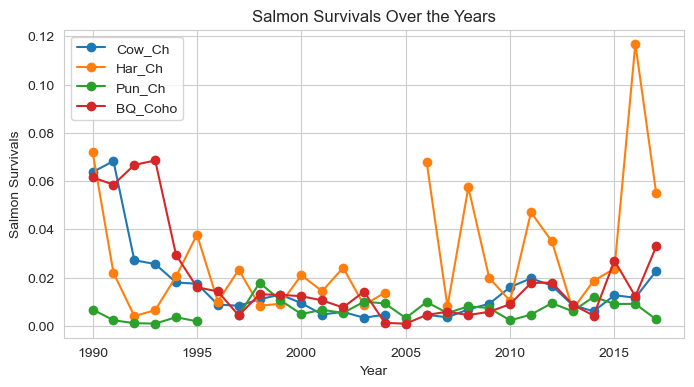

In [8]:
# Plot Salmon Survivals Over the Years
plt.figure(figsize=(8, 4))

for salmon_type in salmonTypes_List:
    plt.plot(salmonSurvivals['year'], salmonSurvivals[salmon_type], label=salmon_type, marker='o')

plt.title('Salmon Survivals Over the Years')
plt.xlabel('Year')
plt.ylabel('Salmon Survivals')
plt.legend()
plt.grid(True)
plt.show()

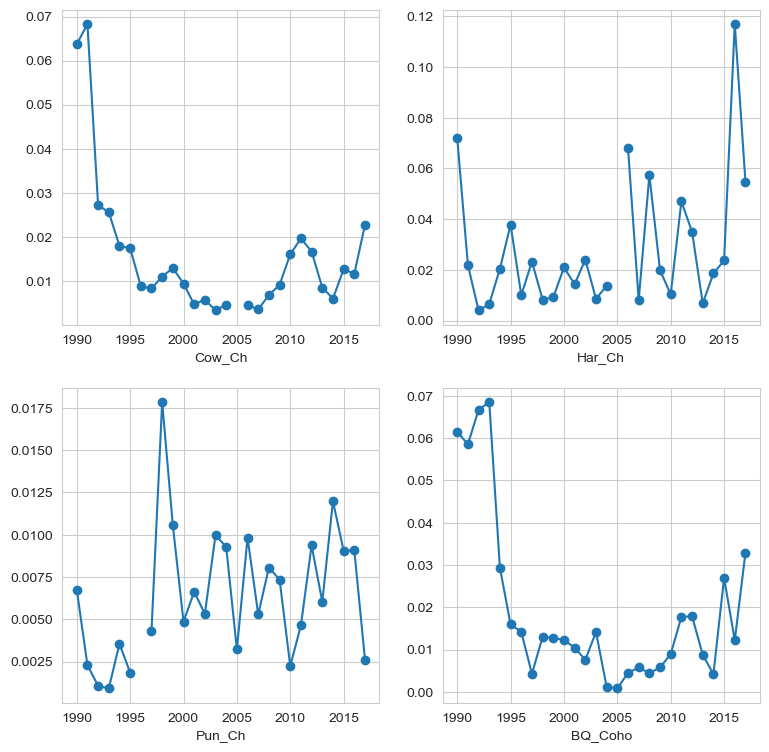

In [9]:
# Plot Salmon Survivals Over the Years for each type

## fill in plt.subplots
fig,axes = plt.subplots(2,2,figsize=(9,9))

## fill in the 0,0 plot here
salmon_type=salmonTypes_List[0]
ax=axes[0,0]
ax.plot(salmonSurvivals['year'], salmonSurvivals[salmon_type], label=salmon_type, marker='o')
ax.set_xlabel(salmon_type, fontsize=10)

## fill in the 0,1 plot here
salmon_type=salmonTypes_List[1]
axes[0,1].plot(salmonSurvivals['year'], salmonSurvivals[salmon_type], label=salmon_type, marker='o')
axes[0,1].set_xlabel(salmon_type, fontsize=10)

## fill in the 1,0 plot here
salmon_type=salmonTypes_List[2]
axes[1,0].plot(salmonSurvivals['year'], salmonSurvivals[salmon_type], label=salmon_type, marker='o')
axes[1,0].set_xlabel(salmon_type, fontsize=10)

## fill in the 1,1 plot here
salmon_type=salmonTypes_List[3]
axes[1,1].plot(salmonSurvivals['year'], salmonSurvivals[salmon_type], label=salmon_type, marker='o')
axes[1,1].set_xlabel(salmon_type, fontsize=10)

plt.show()

## Total Biomass

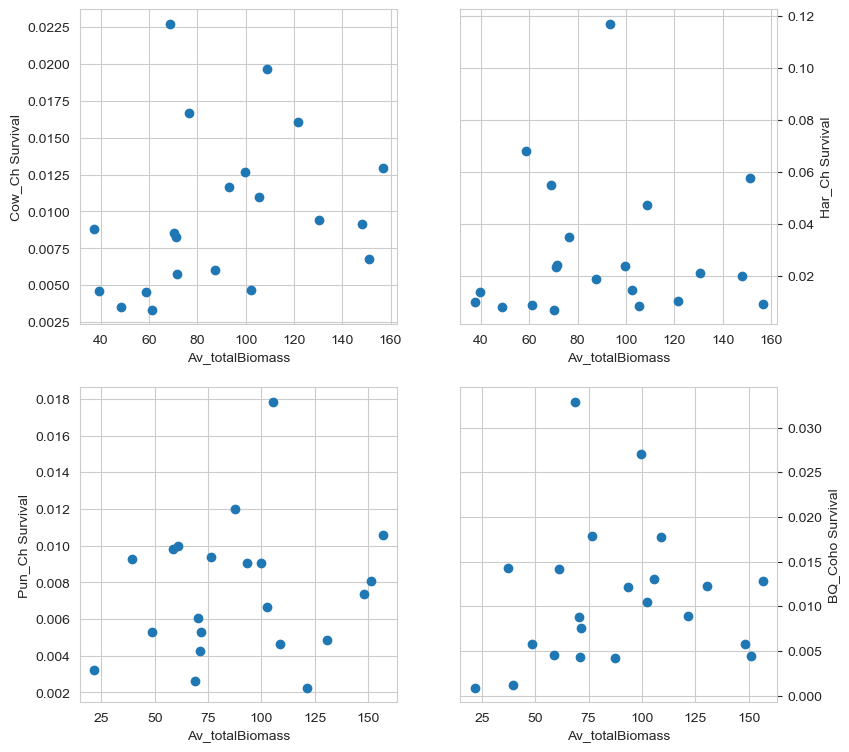

In [10]:
scatter_All_salmonSurv(totalBiomass_av)

## ZooPlanktons

In [11]:
BiomassDefs[BiomassDefs['key'].isin([s.replace("Av_", '''''') for s in plankBiomassMean.columns])]

key                       unique key for each tow
19          AmphiGam             Gammarid amphipod biomass (mg/m3)
20          AmphiHyp             Hyperiid amphipod biomass (mg/m3)
21       BenthicLarv  Biomass of larvae of benthic animals (mg/m3)
22      CalCops.larg        Large calanoid copepod biomass (mg/m3)
23       CalCops.med       Medium calanoid copepod biomass (mg/m3)
24      CalCops.smal        Small calanoid copepod biomass (mg/m3)
25       Cephalopoda                    Cephalopod biomass (mg/m3)
26      Chaetognatha                  Chaetognatha biomass (mg/m3)
27         Cladocera                     Cladocera biomass (mg/m3)
28        Ctenophora                    Ctenophora biomass (mg/m3)
29             Euphs                    Euphausiid biomass (mg/m3)
30              Fish                Biomass of larval fish (mg/m3)
31          Larvacea                     Larvacean biomass (mg/m3)
32           Medusae                       Medusae biomass (mg/m3)
33            Mysids                         Mysid biomass (mg/m3)
34          Natantia                     Nantantia biomass (mg/m3)
35        NonCalCops          Non-calanoid copepod biomass (mg/m3)
36         Ostracoda                      Ostracod biomass (mg/m3)
37             Other               Biomass of 'Other' taxa (mg/m3)
38  PolychaetPelagic            Pelagic polychaeta biomass (mg/m3)
39         Pteropods                      Pteropod biomass (mg/m3)
40          Repantia                      Repantia biomass (mg/m3)
41         Scyphozoa                     Scyphozoa biomass (mg/m3)
42     Siphonophorae                  Siphonophore biomass (mg/m3)

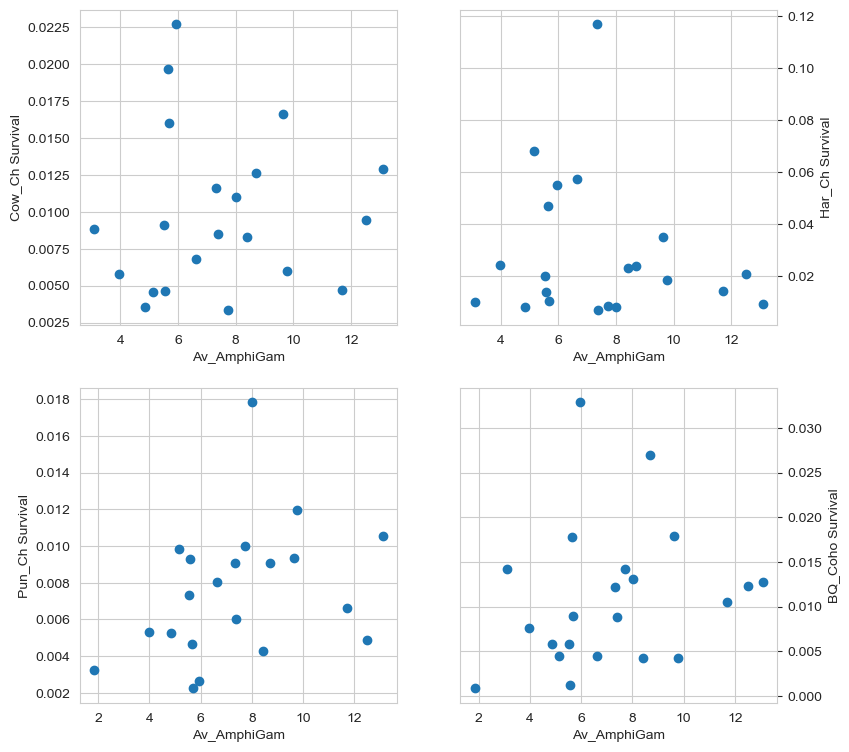

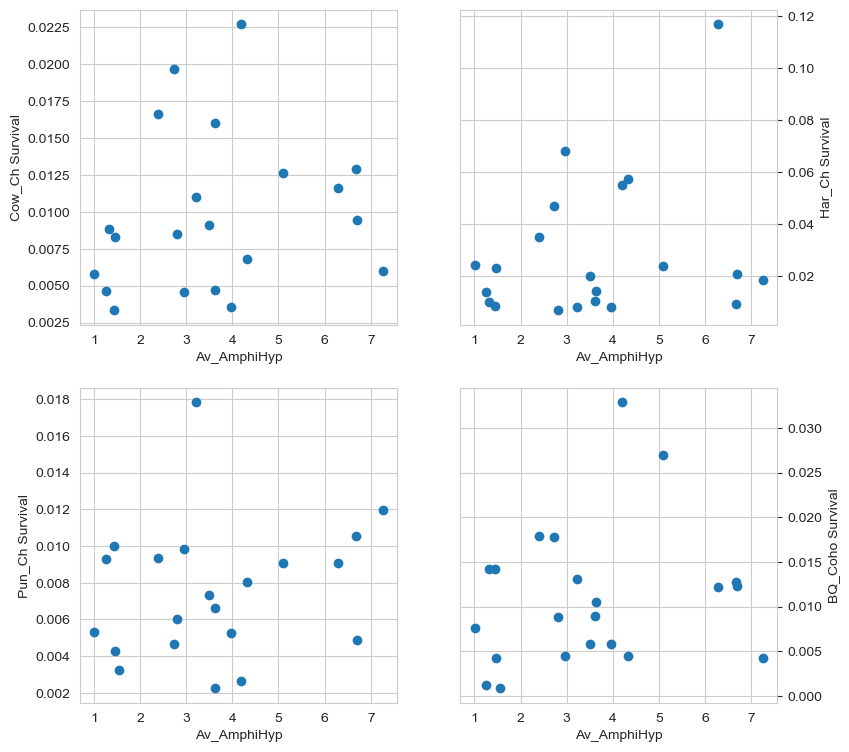

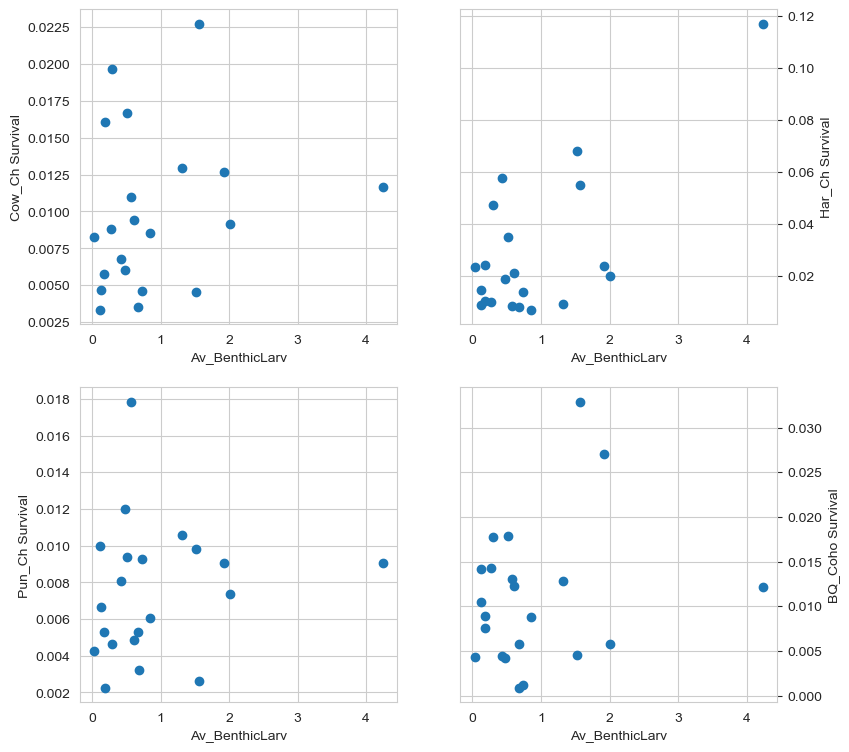

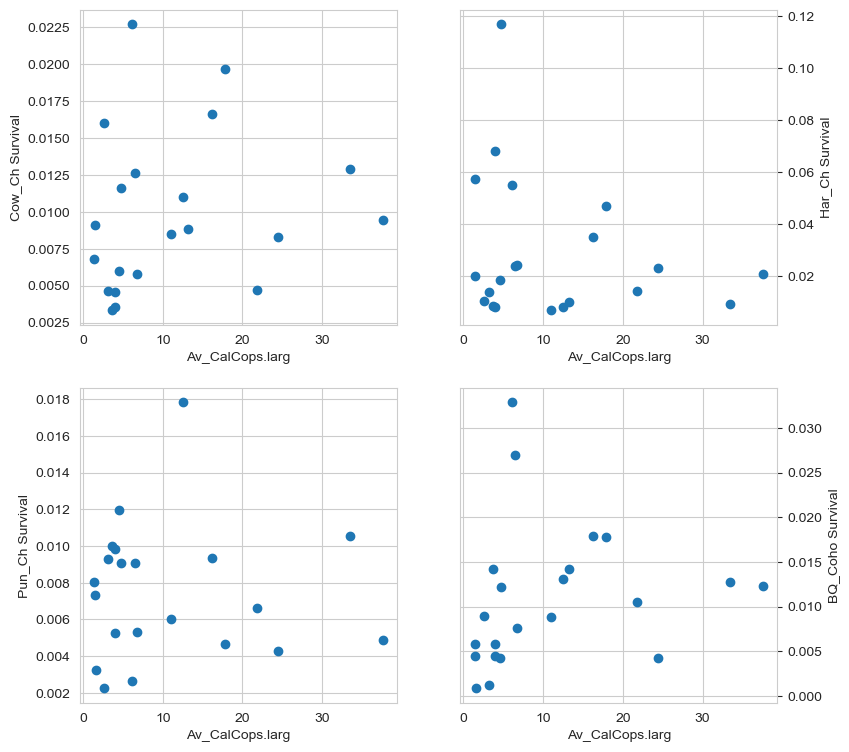

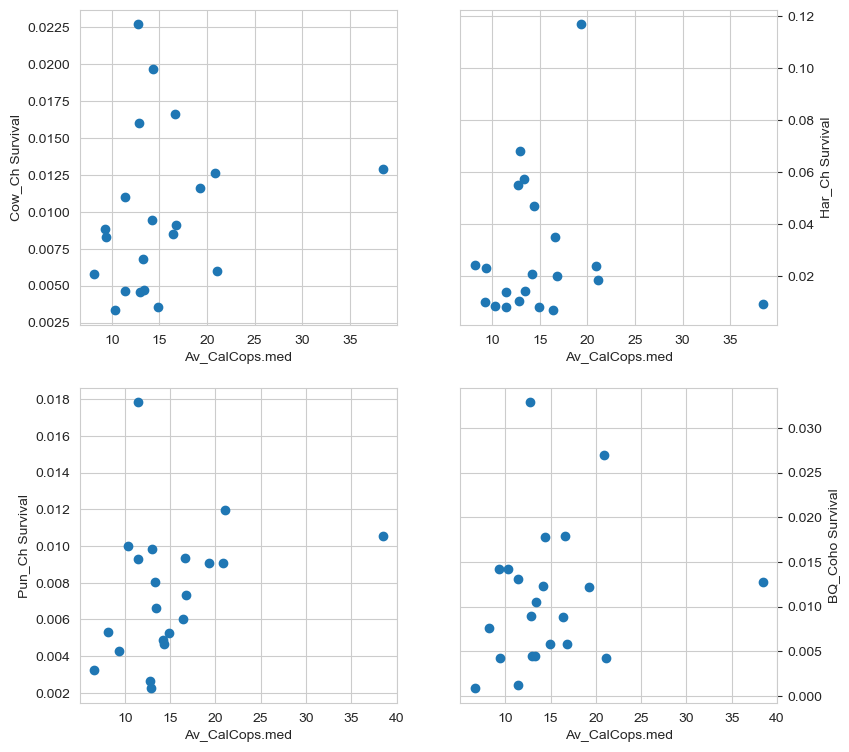

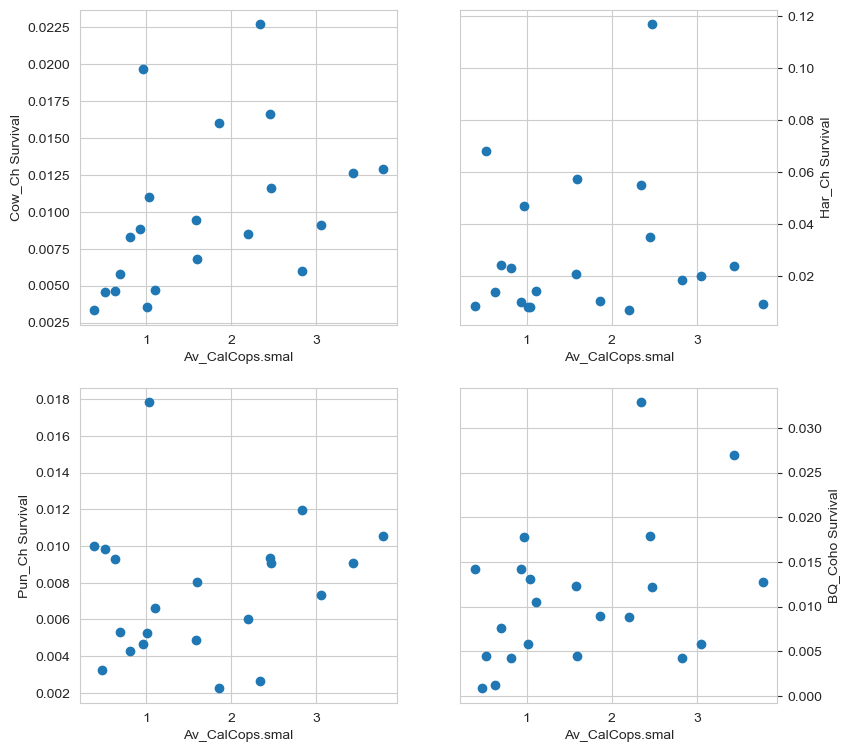

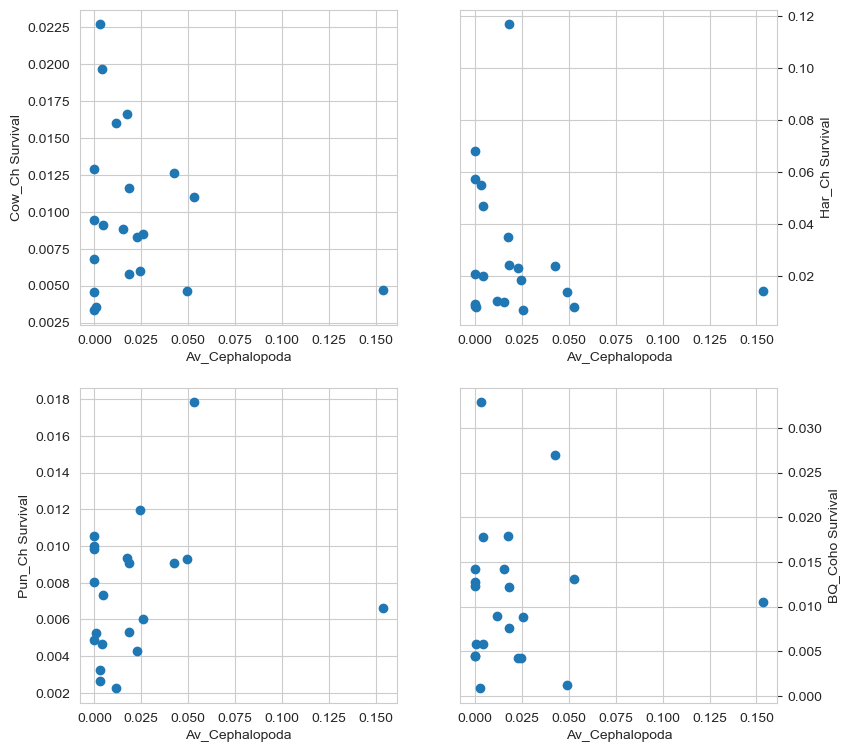

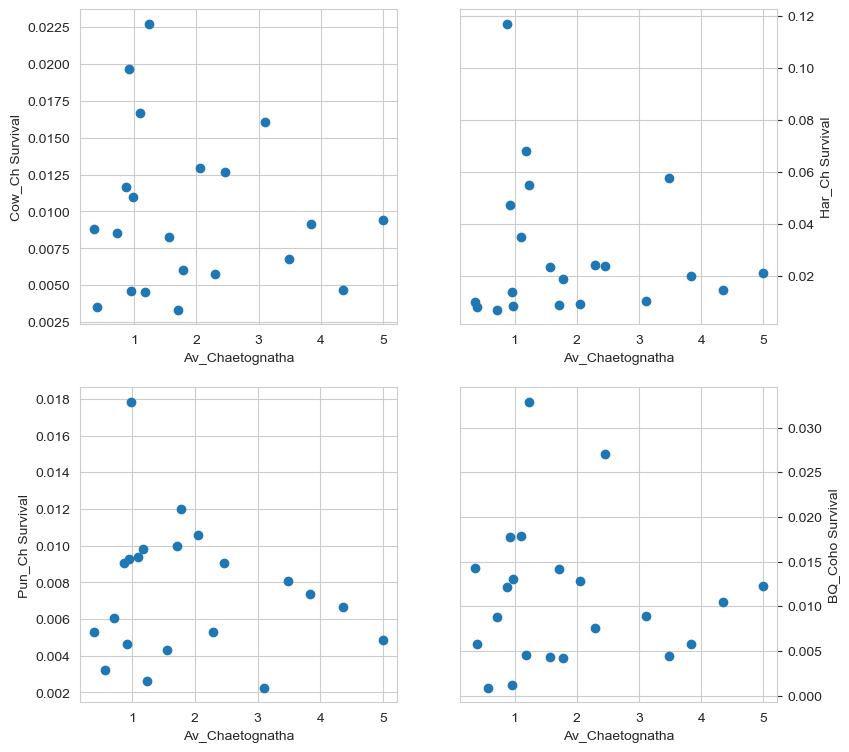

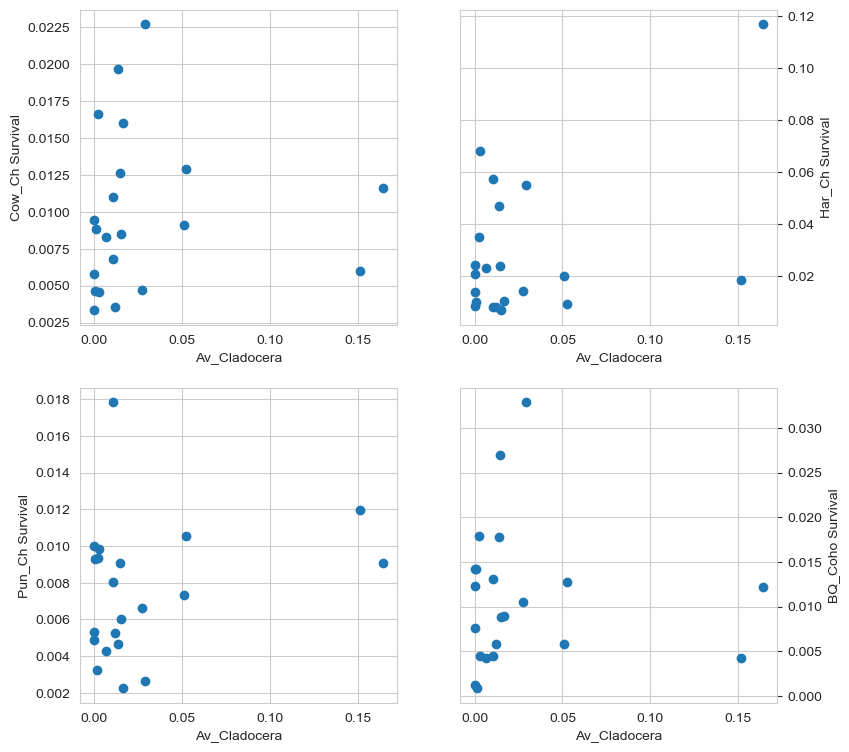

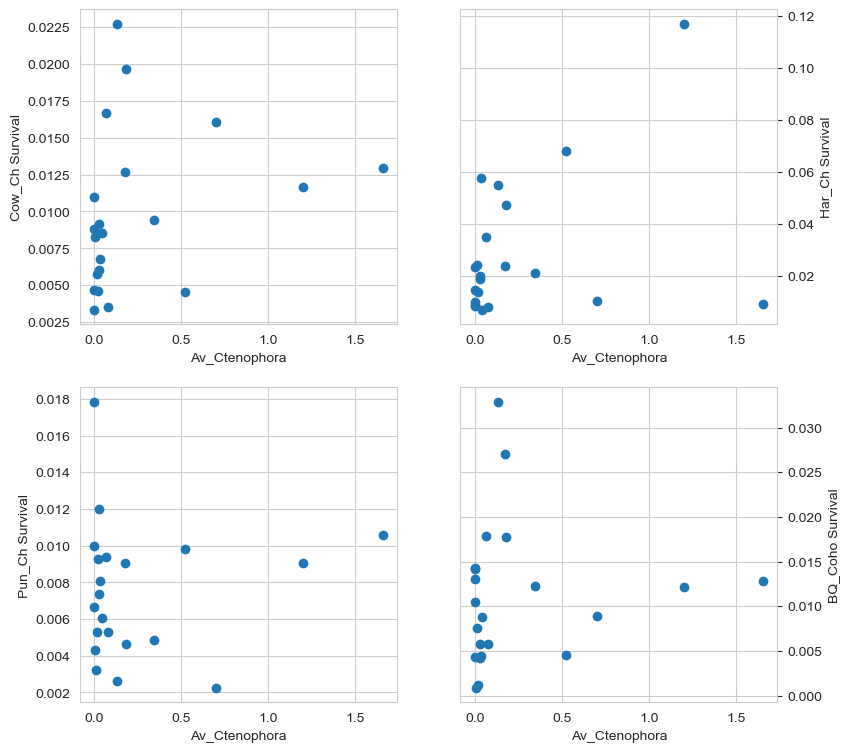

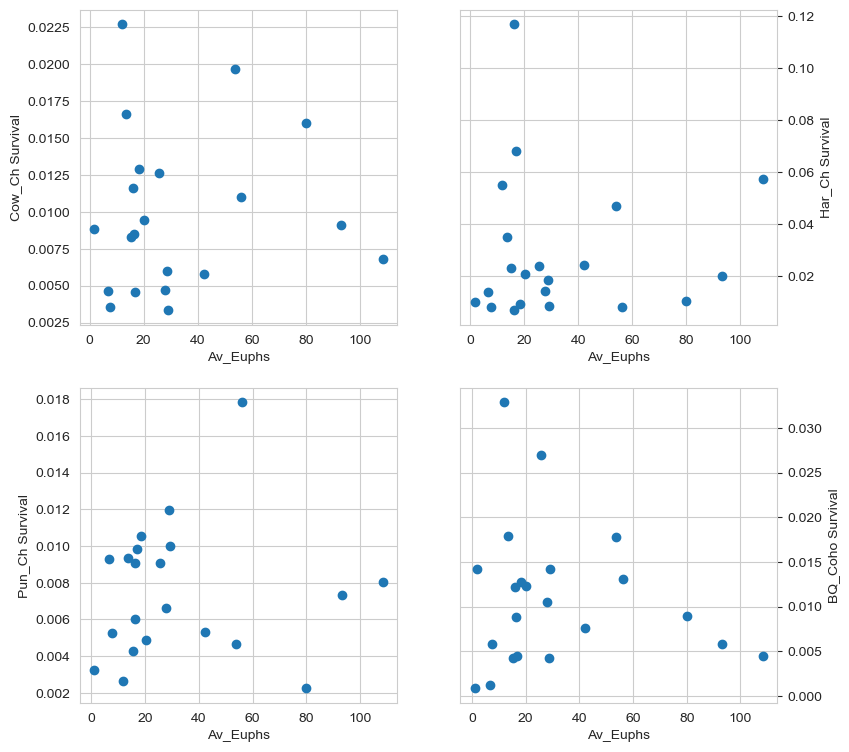

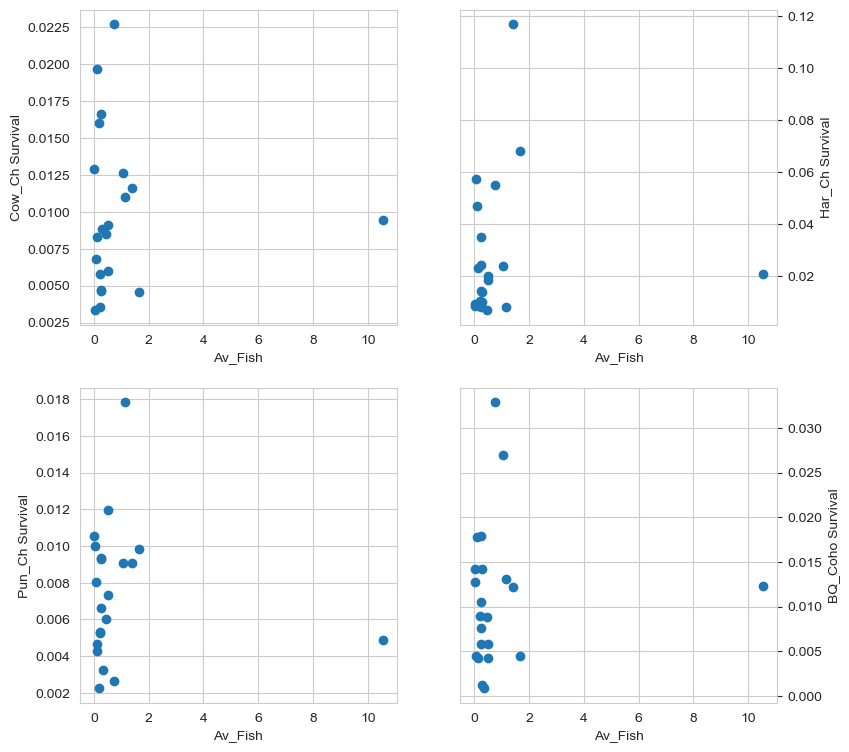

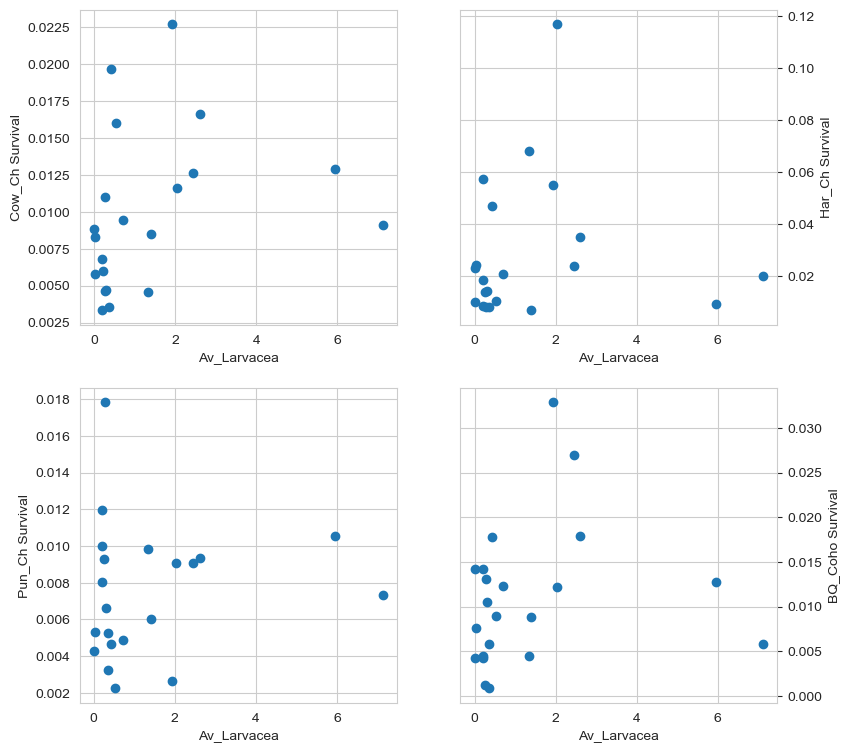

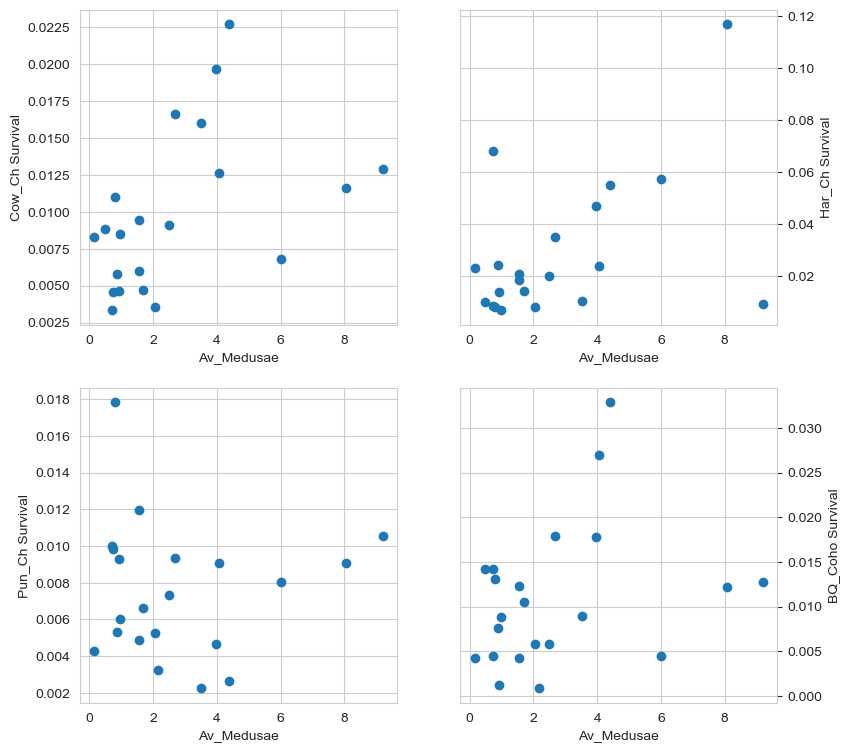

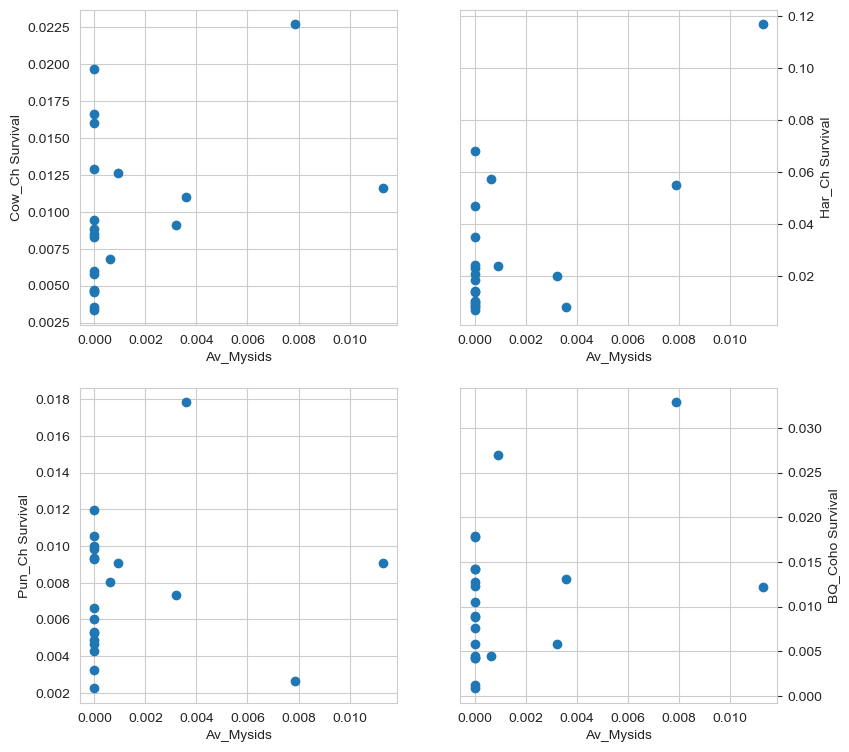

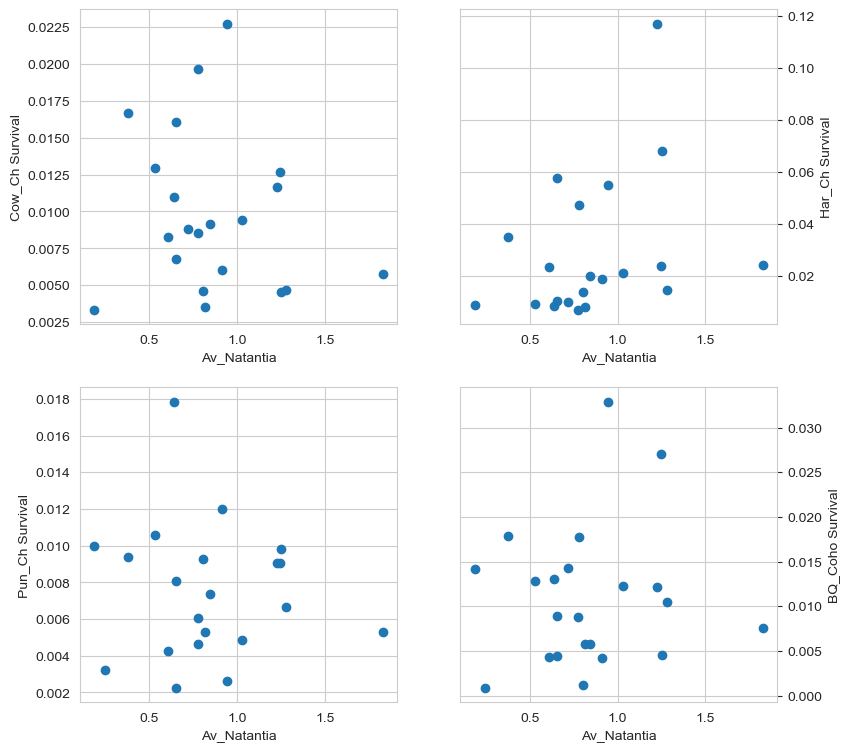

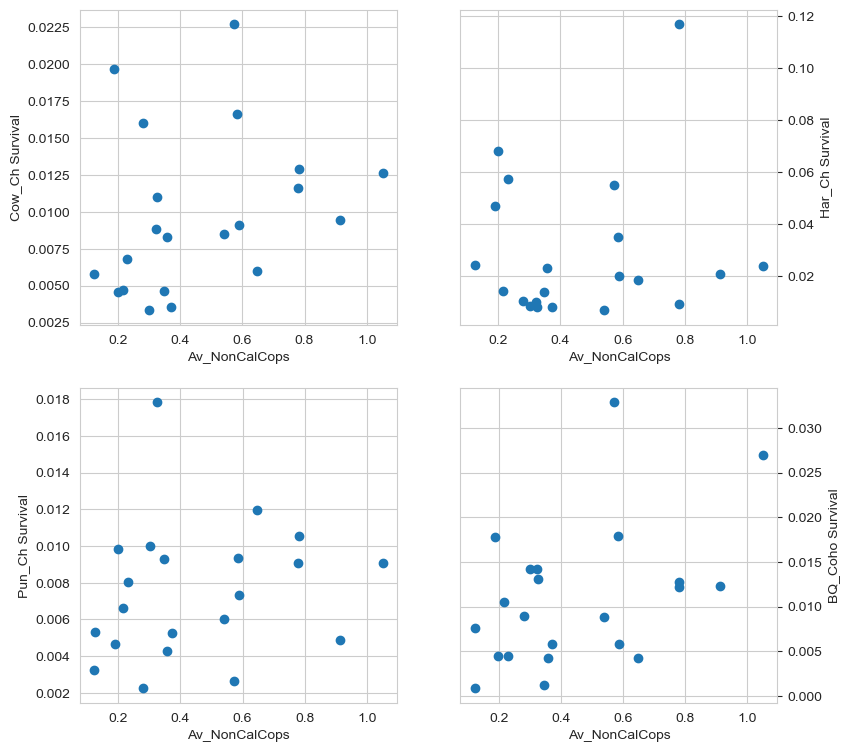

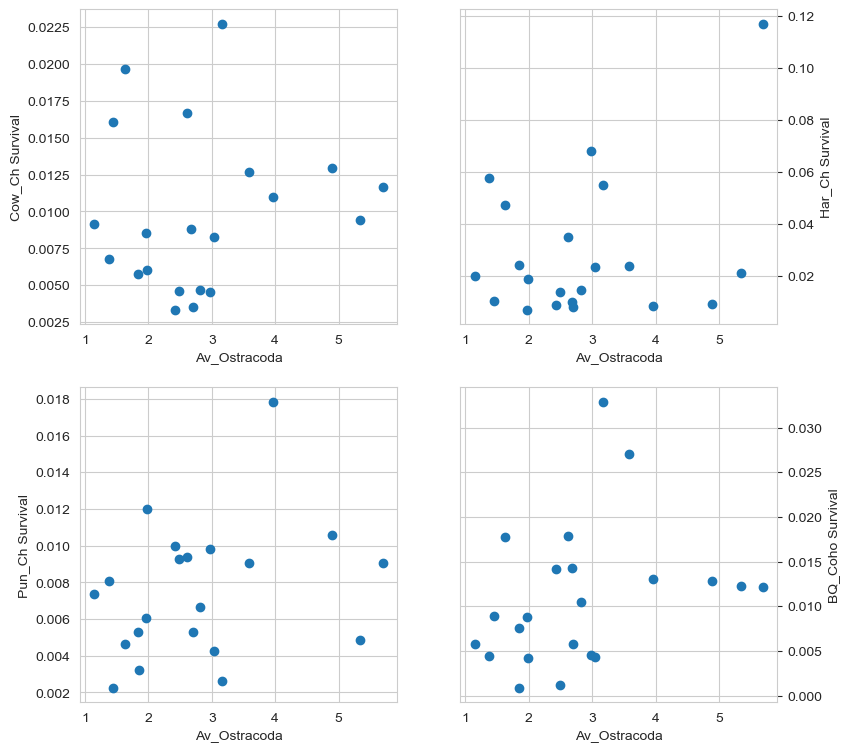

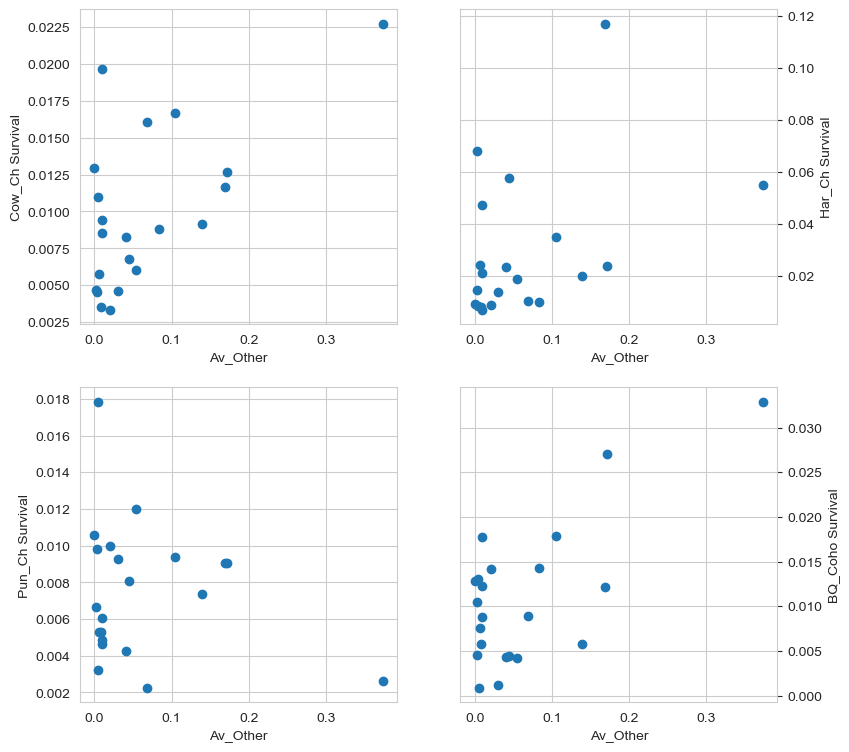

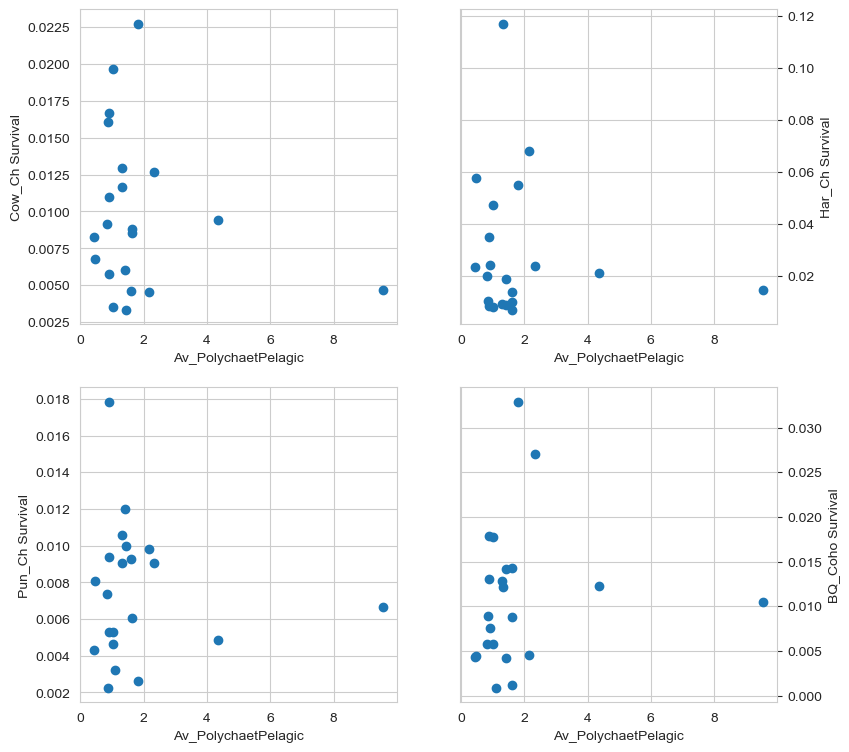

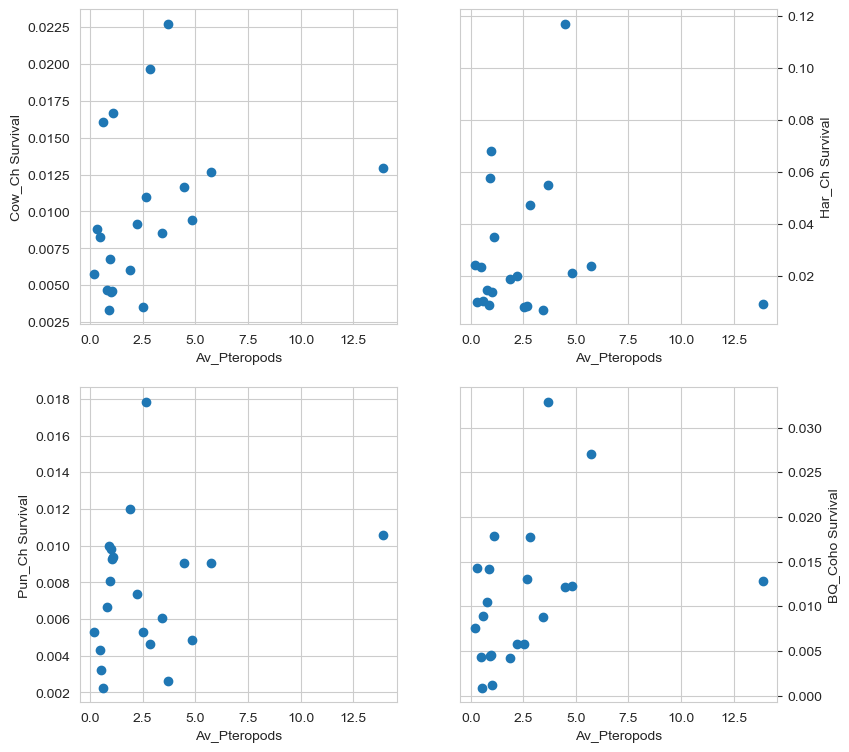

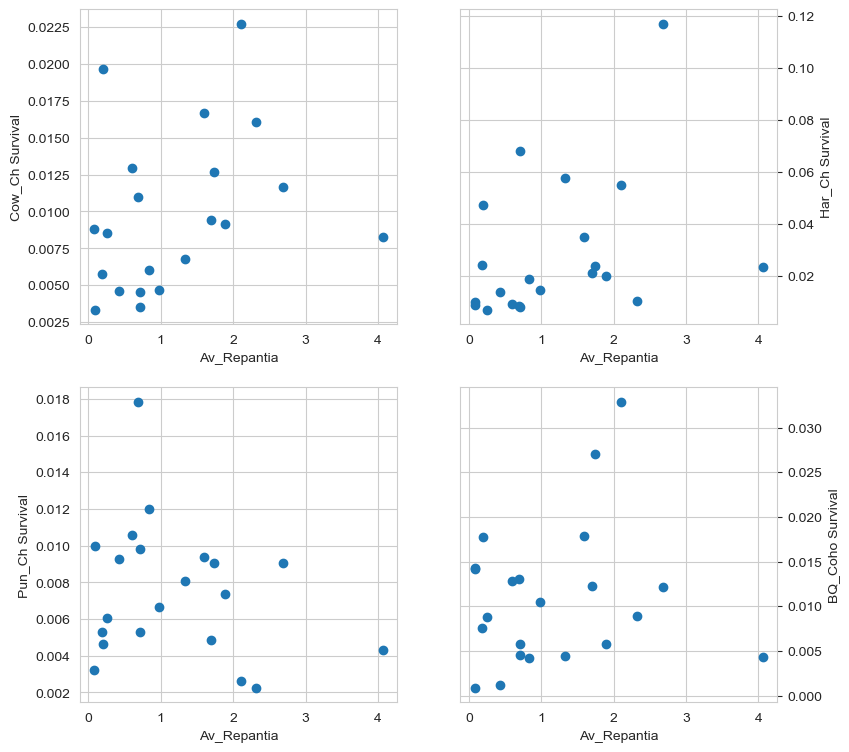

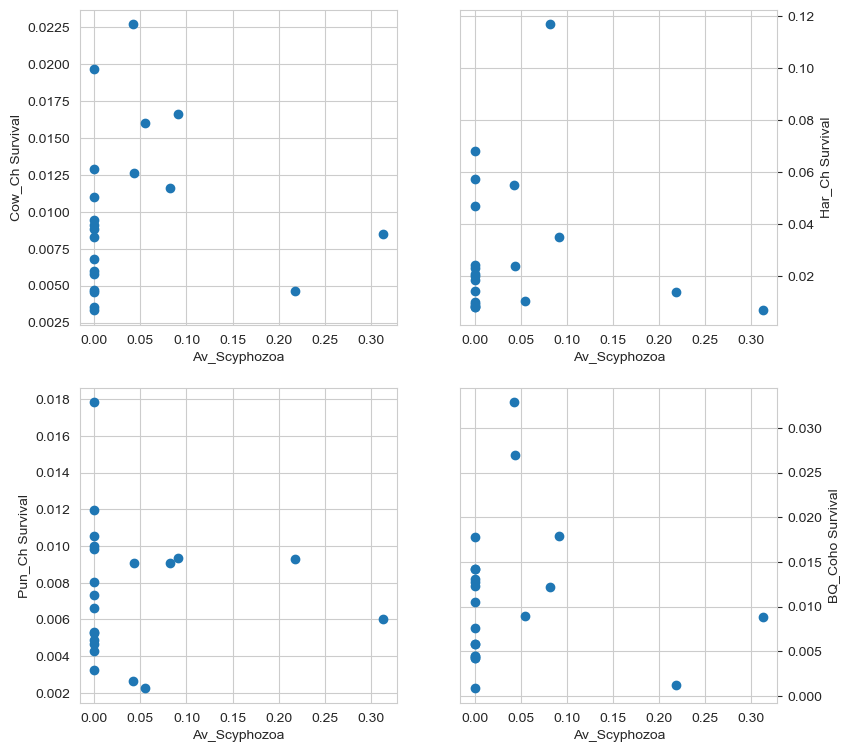

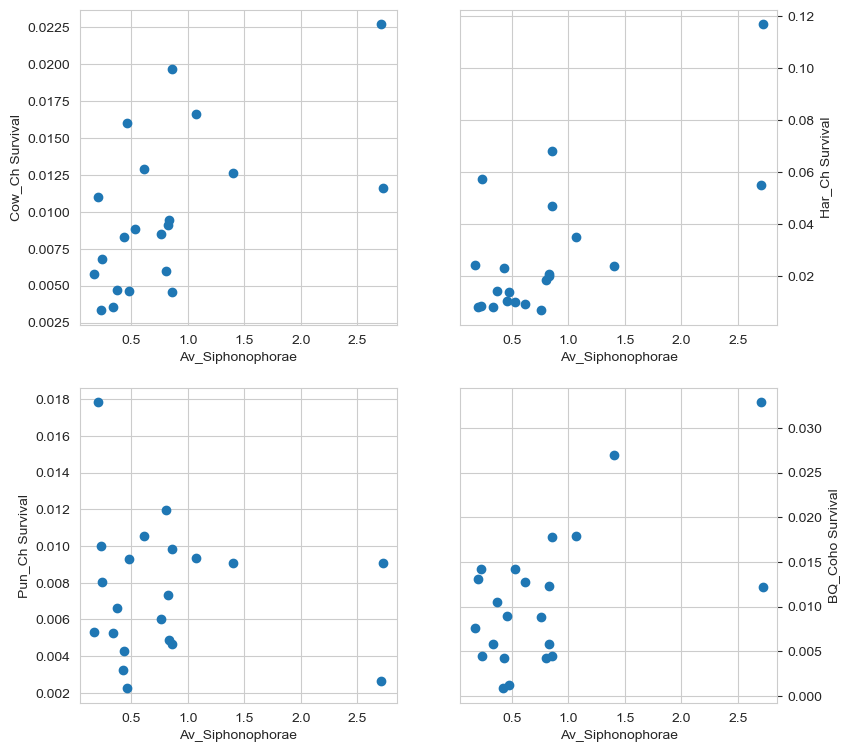

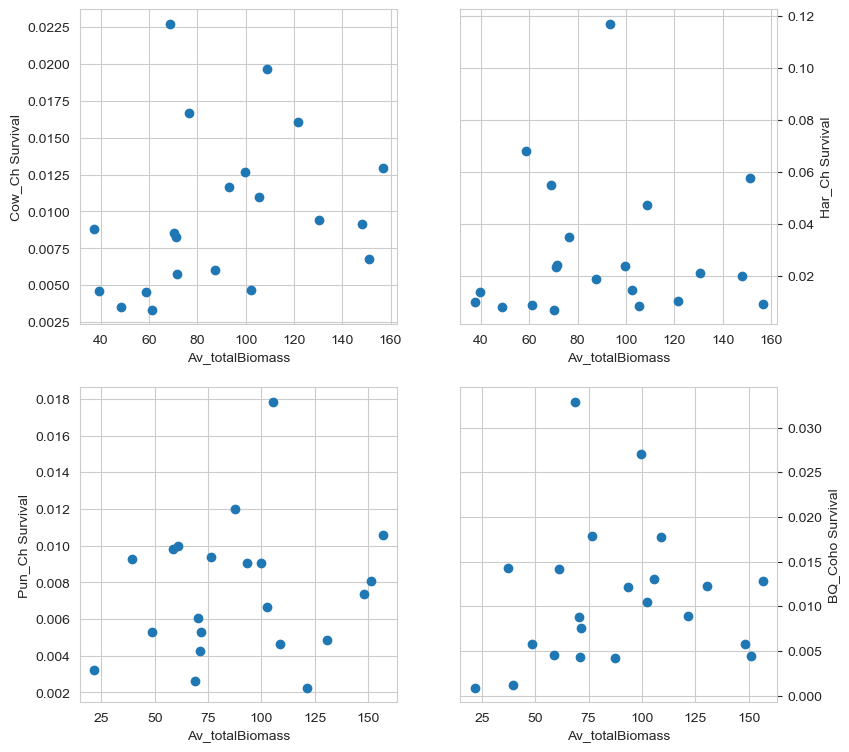

In [12]:
scatter_All_salmonSurv(plankBiomassMean)

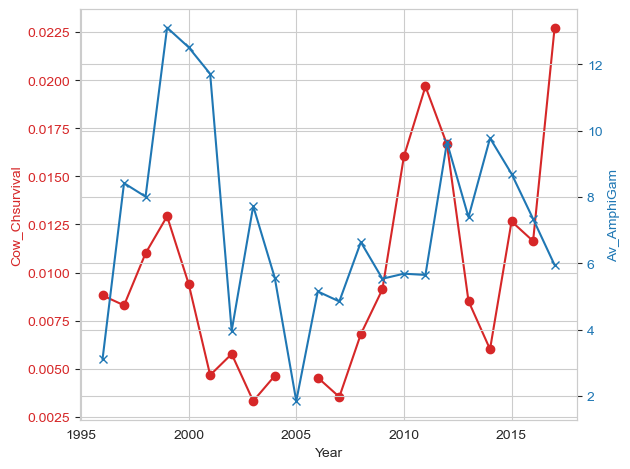

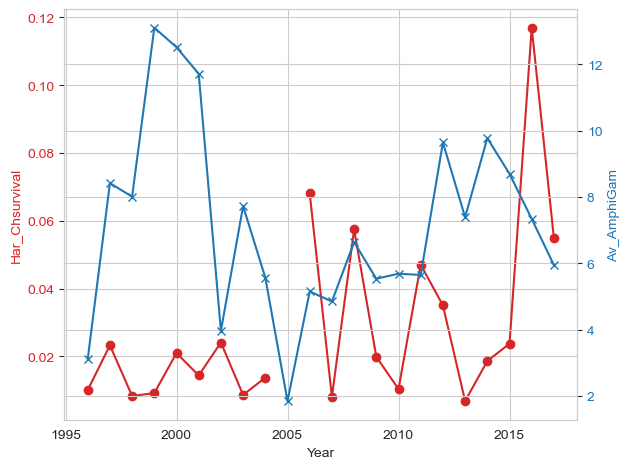

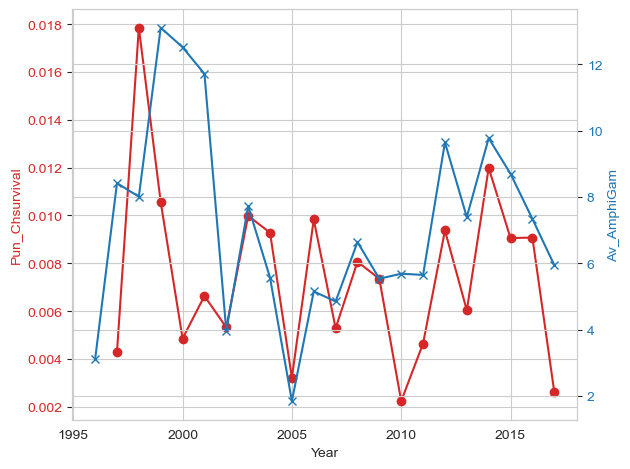

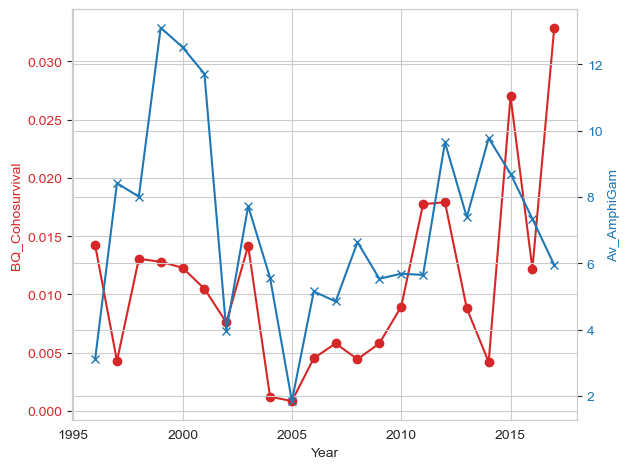

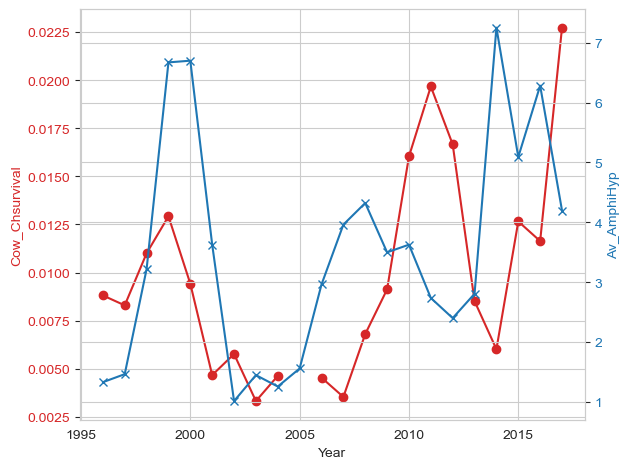

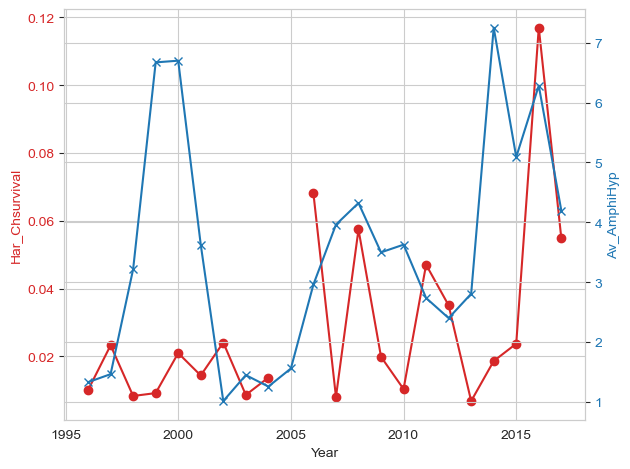

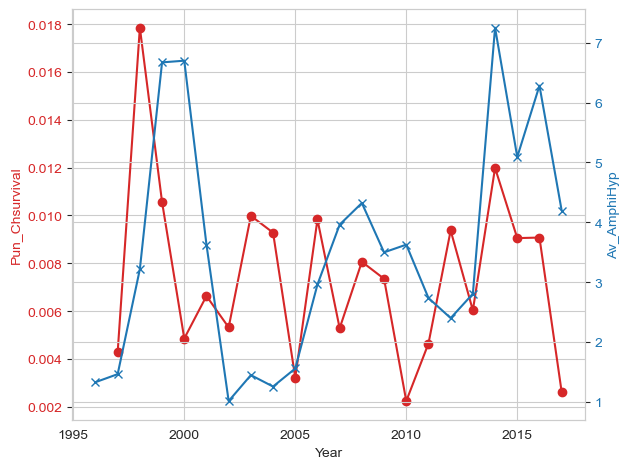

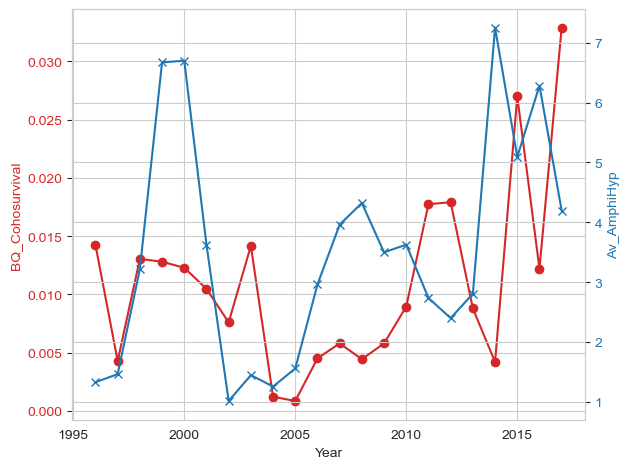

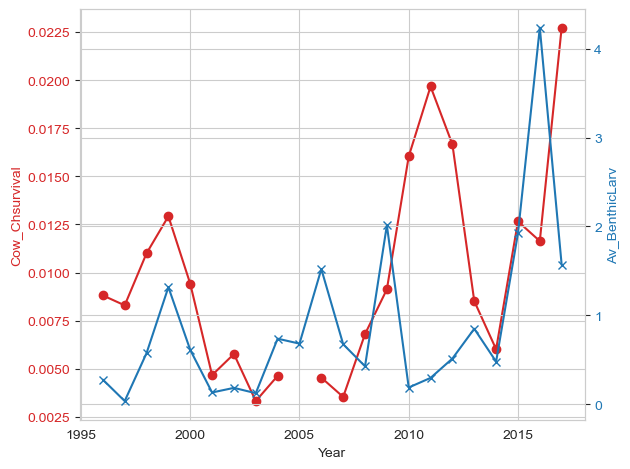

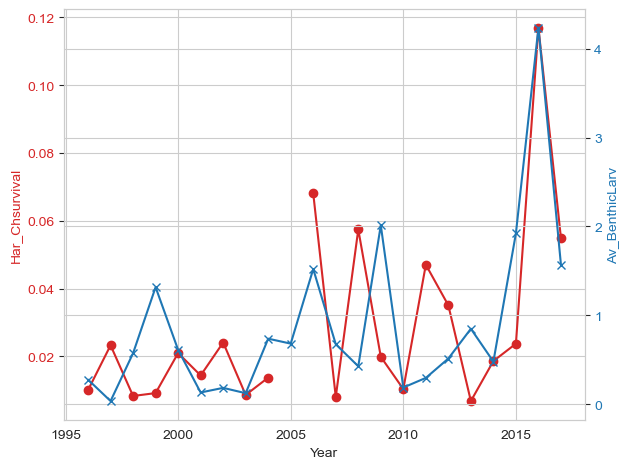

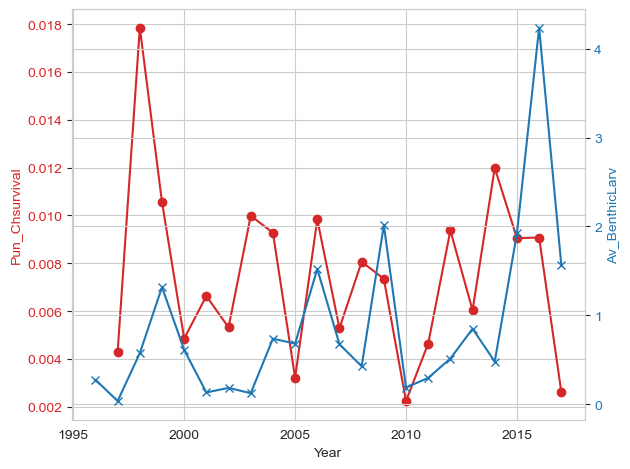

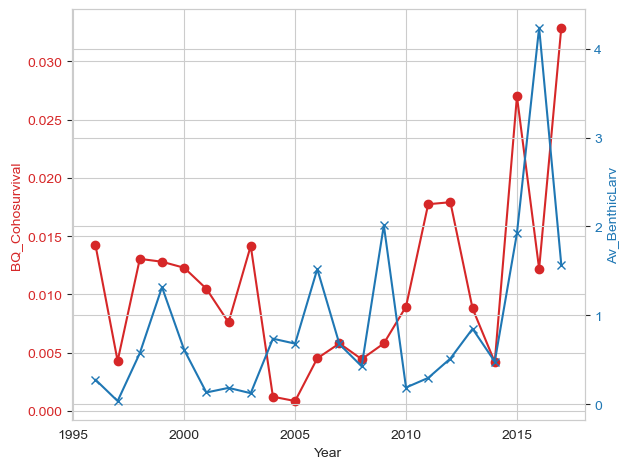

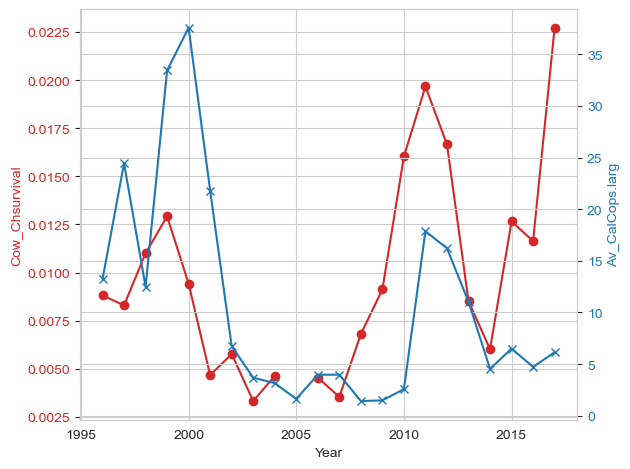

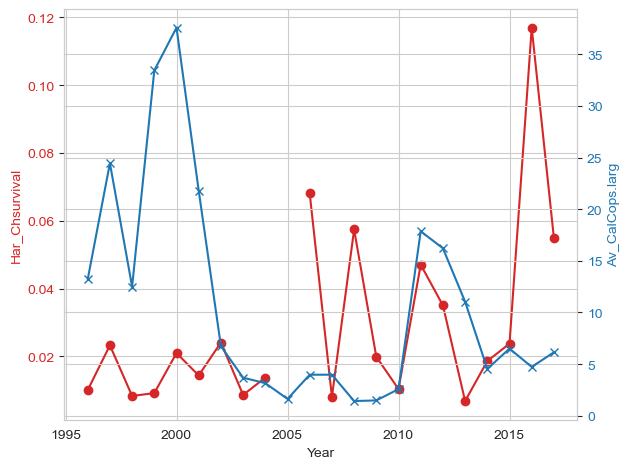

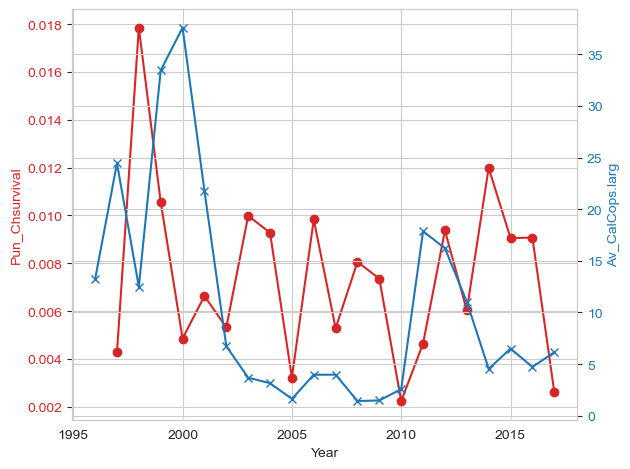

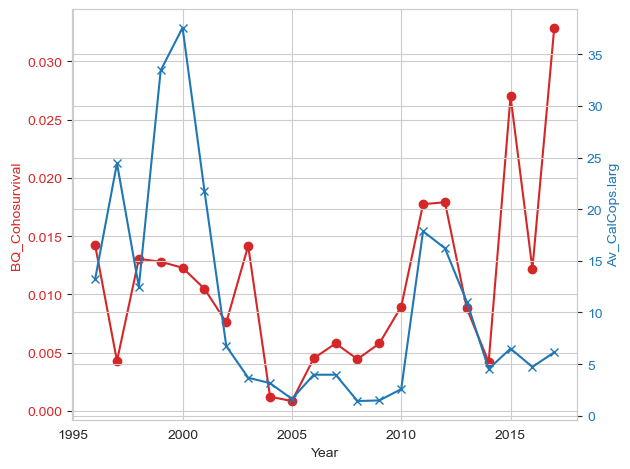

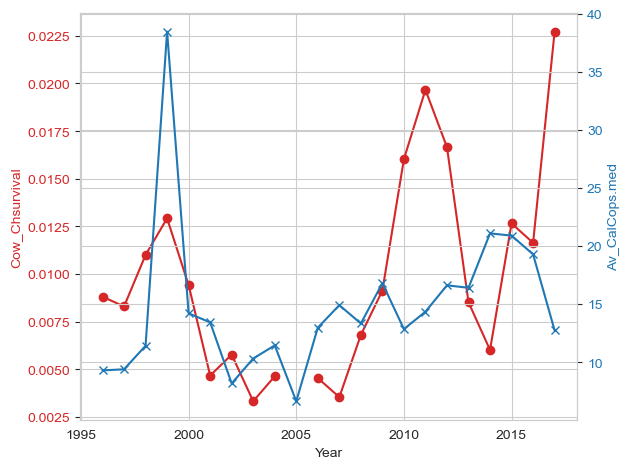

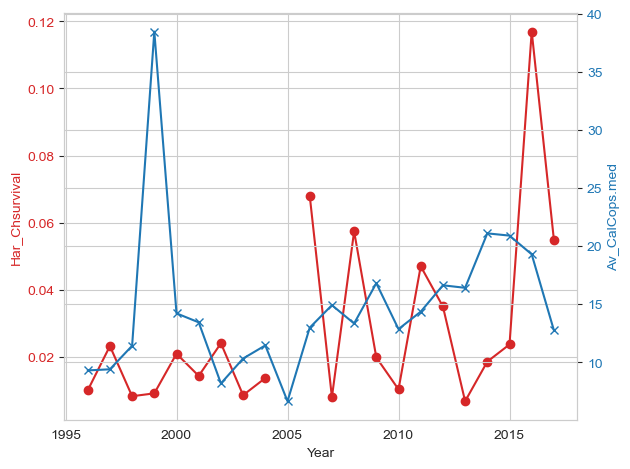

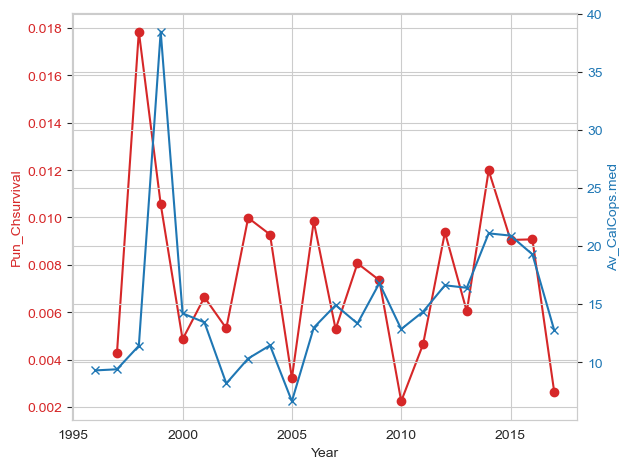

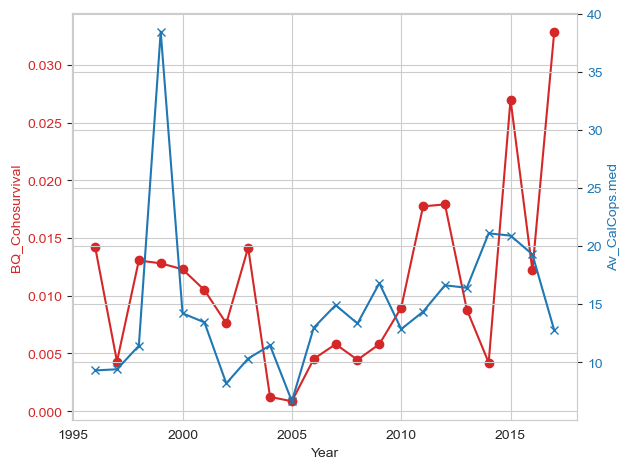

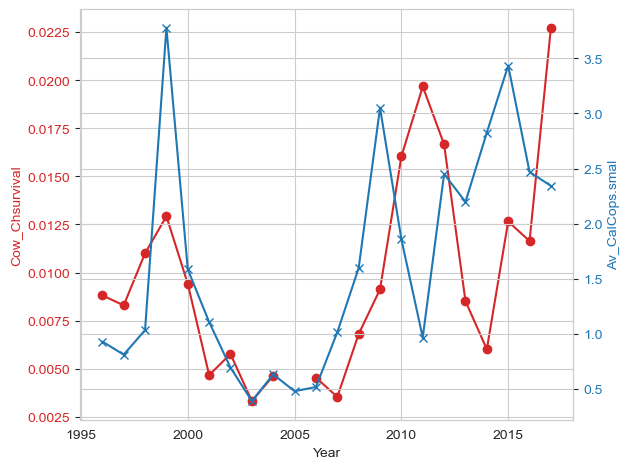

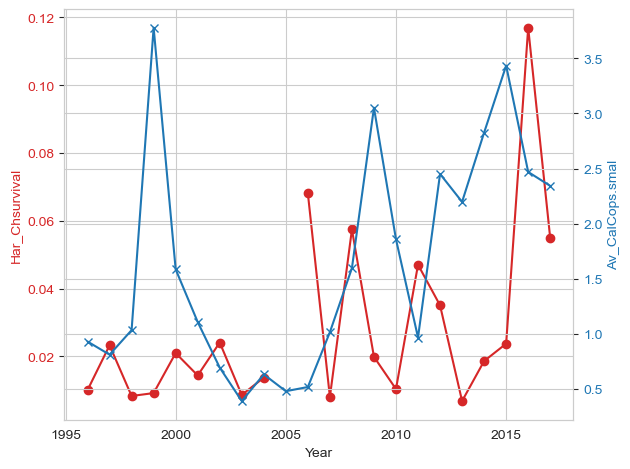

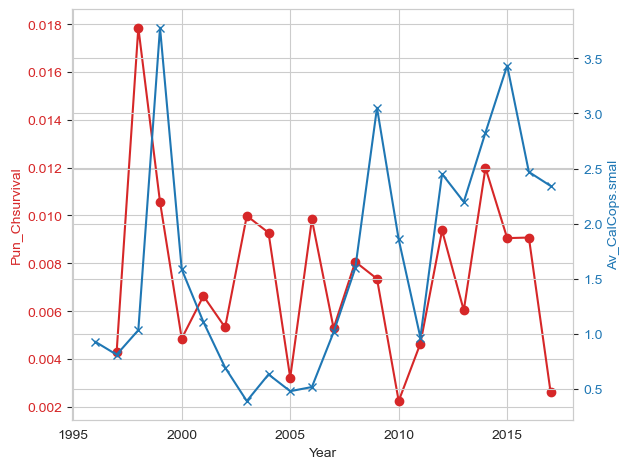

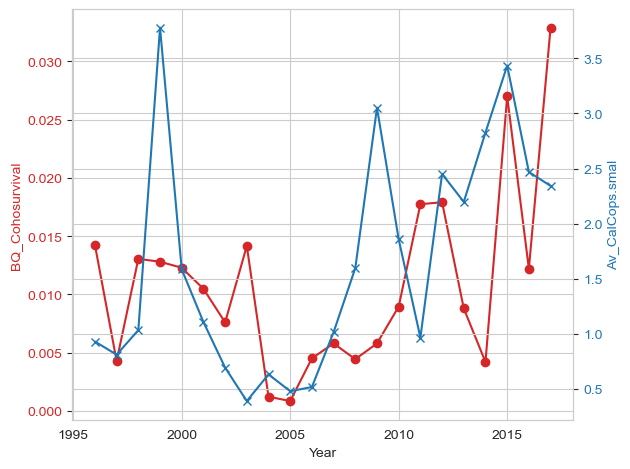

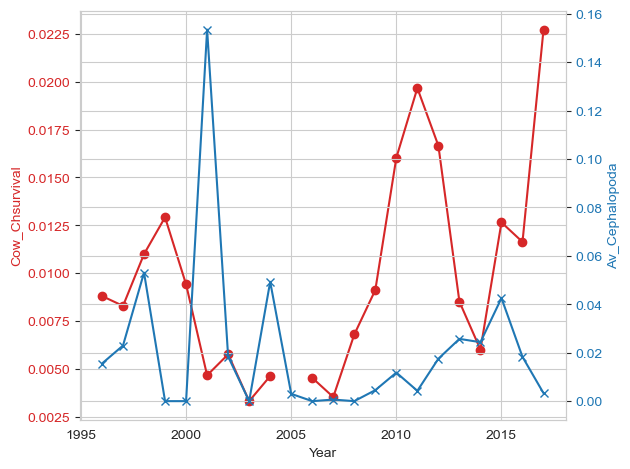

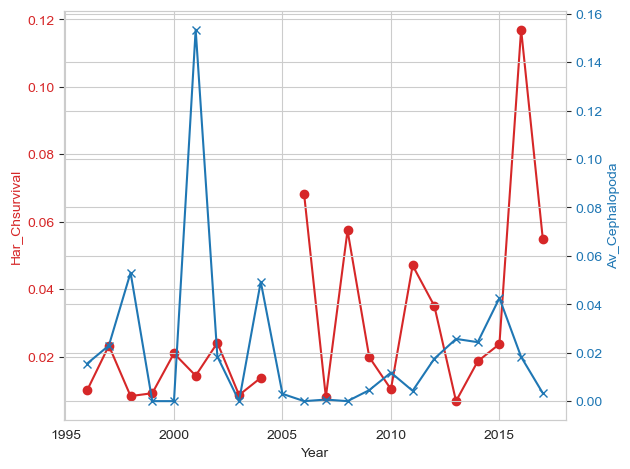

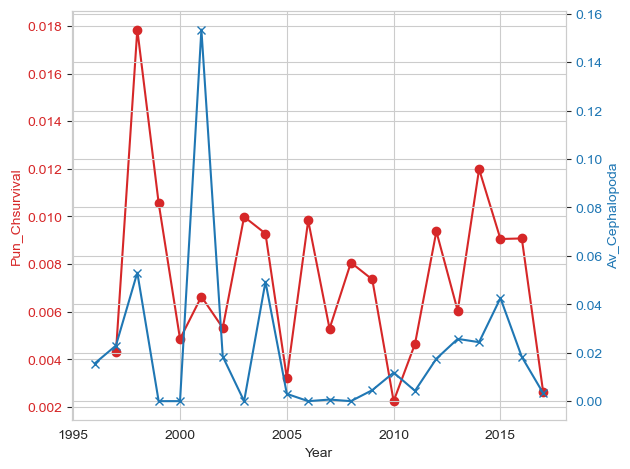

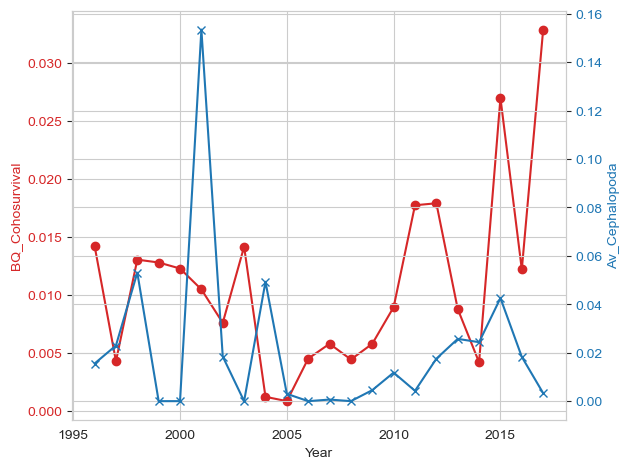

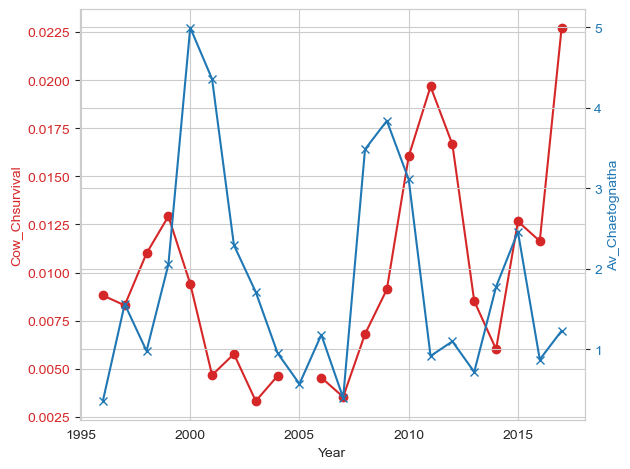

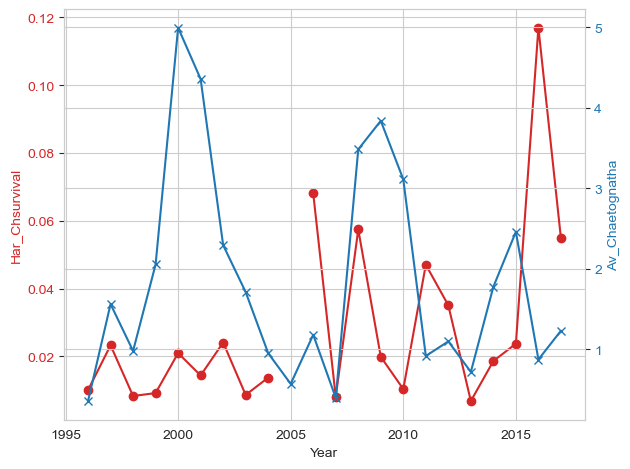

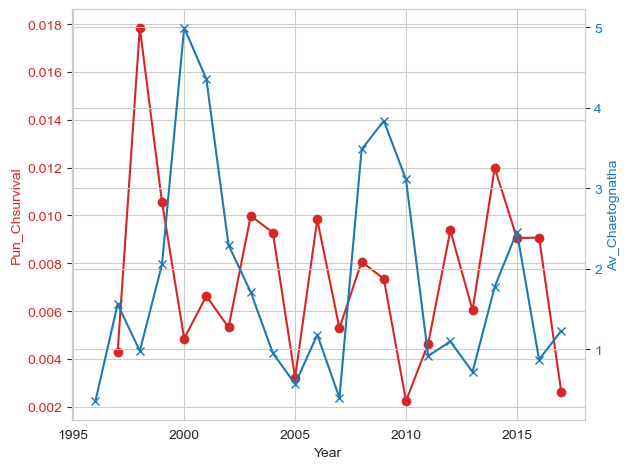

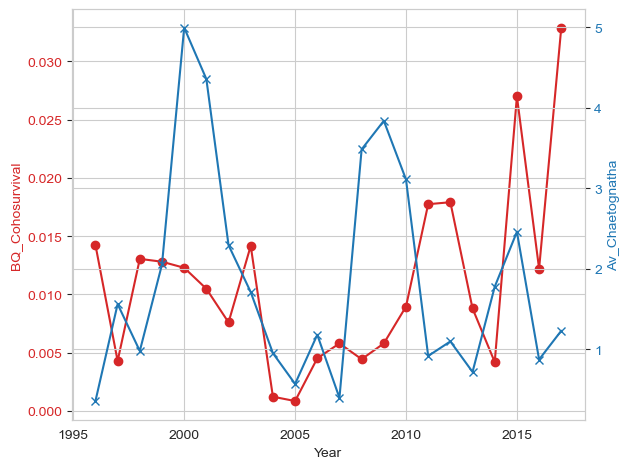

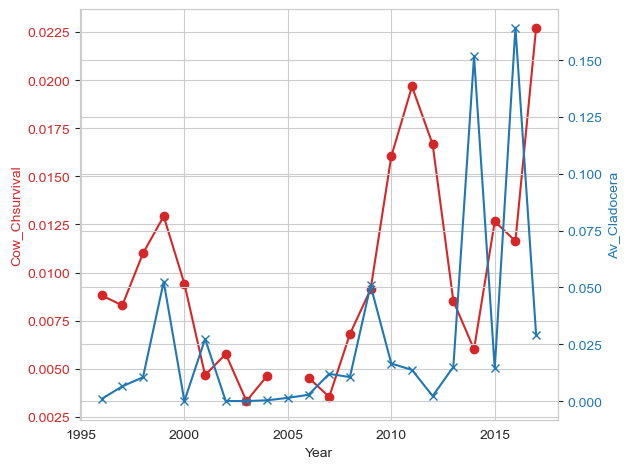

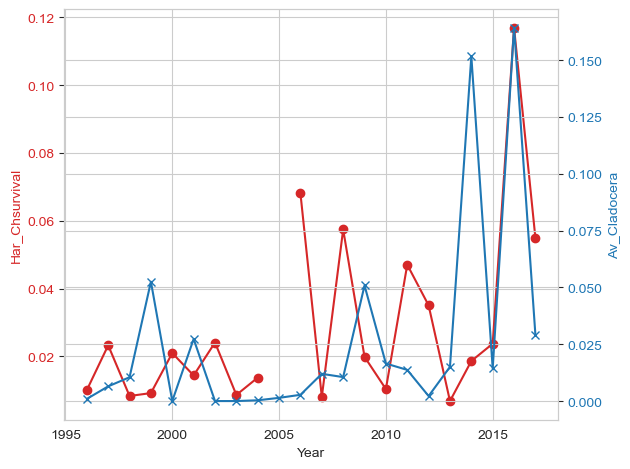

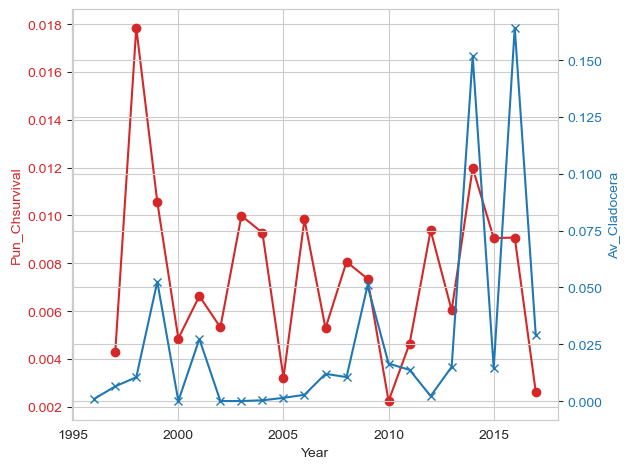

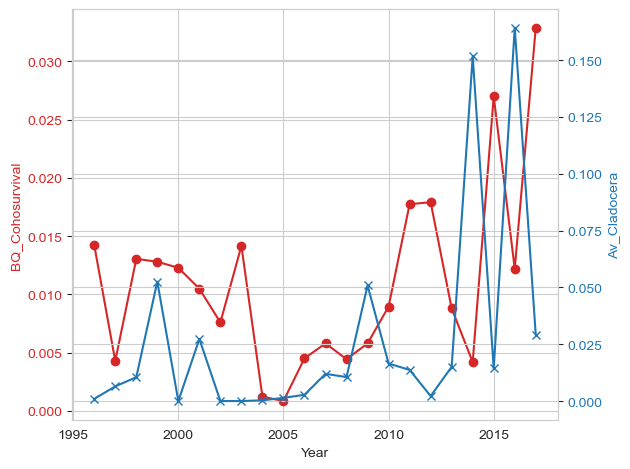

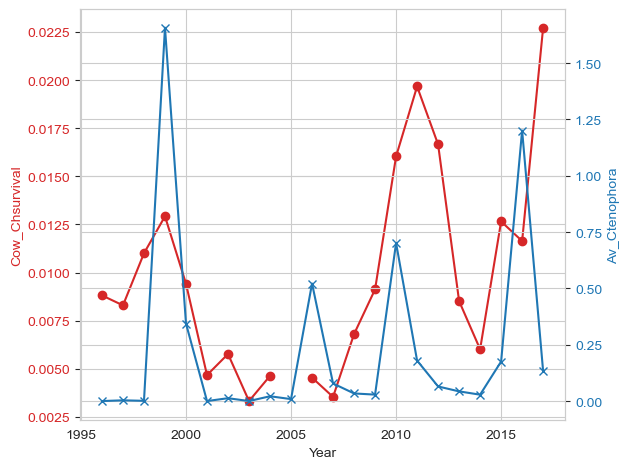

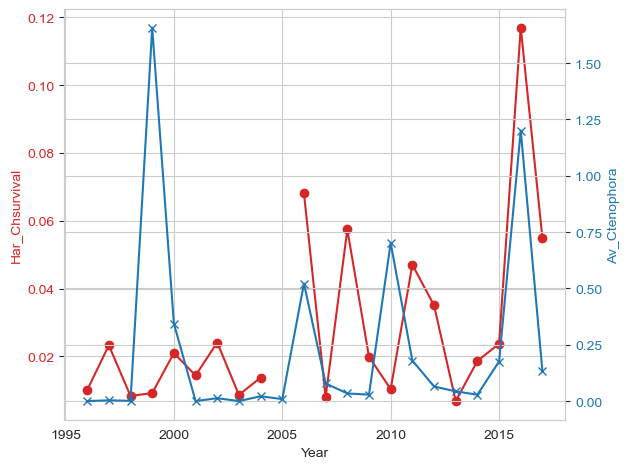

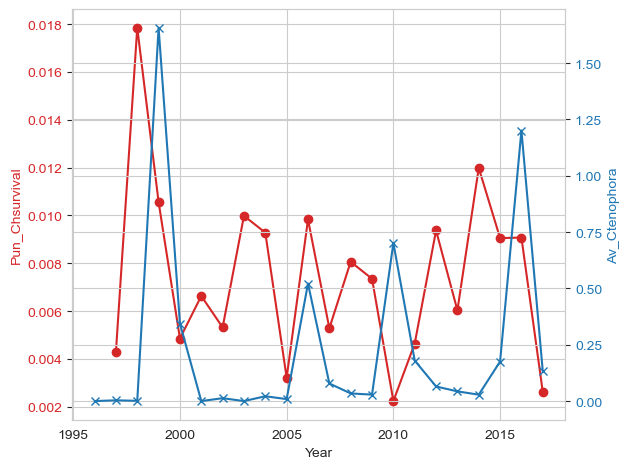

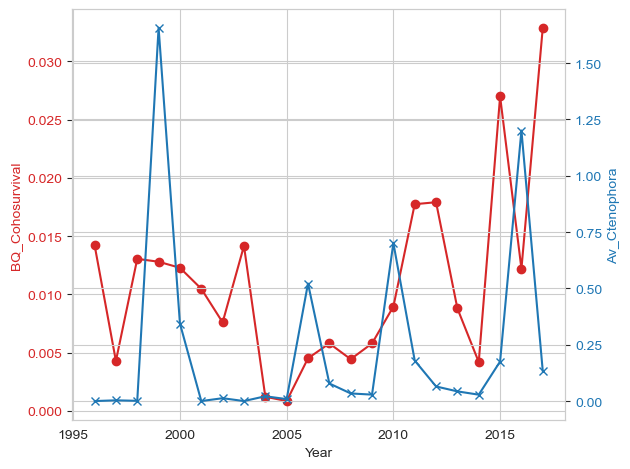

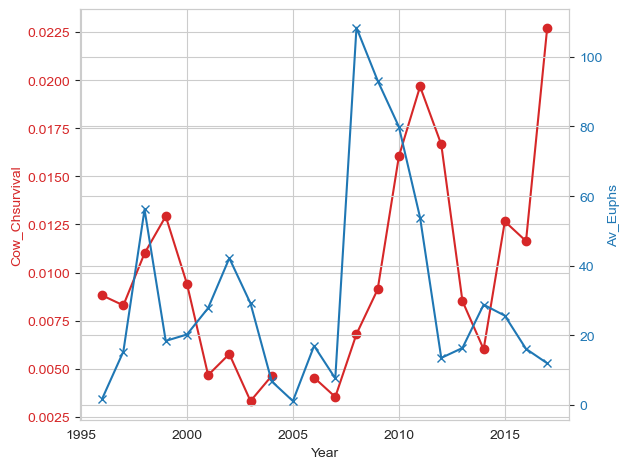

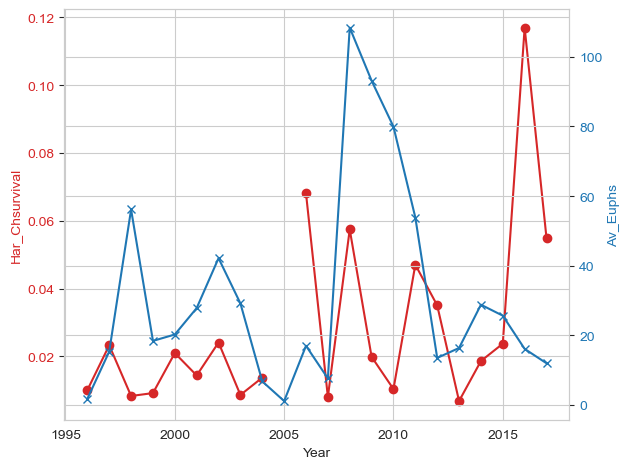

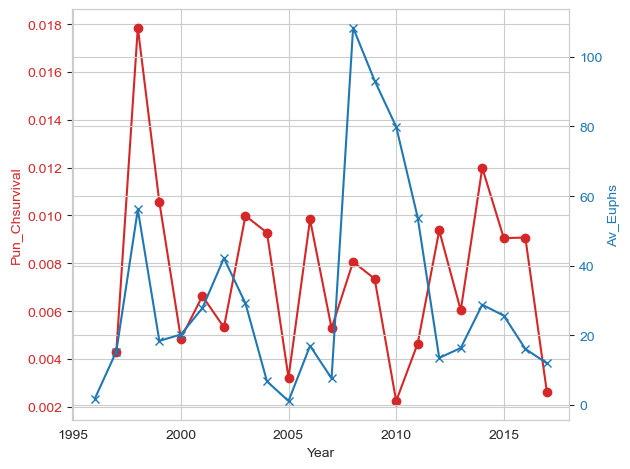

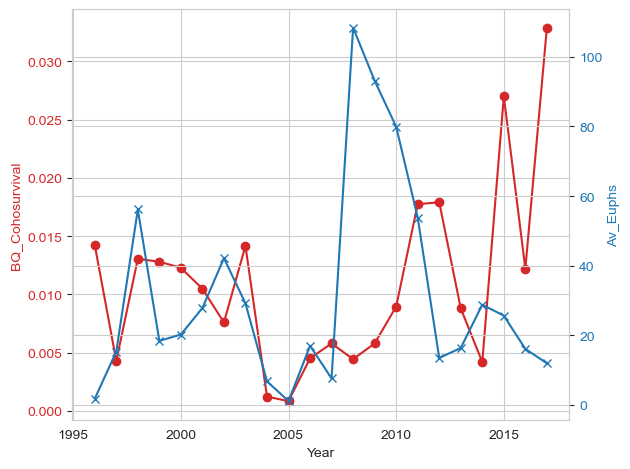

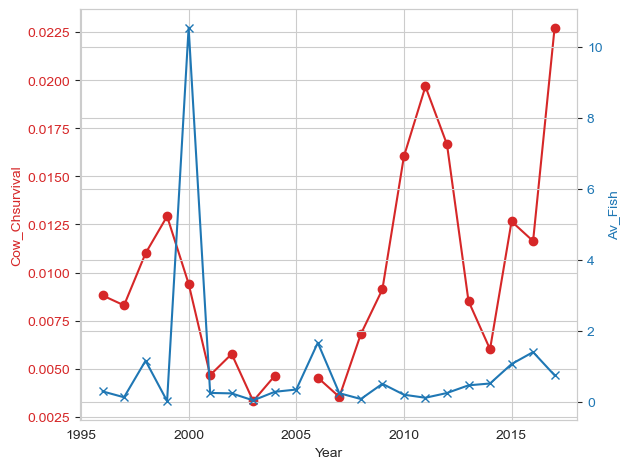

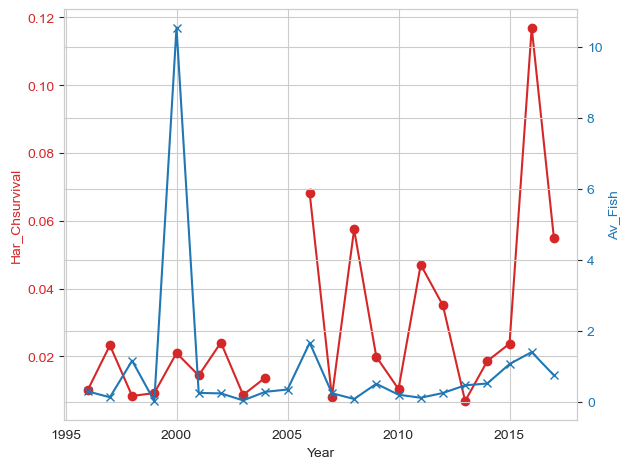

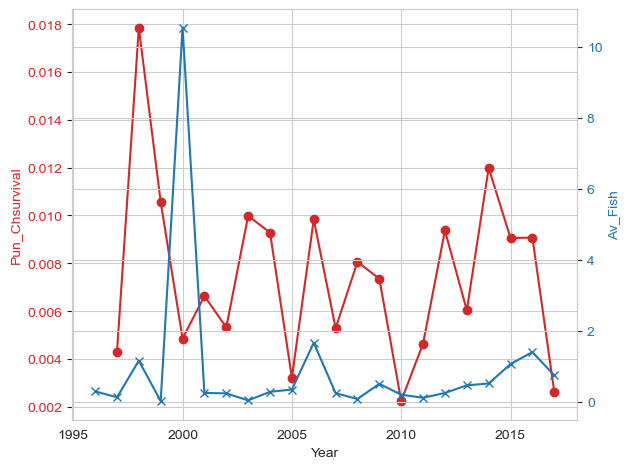

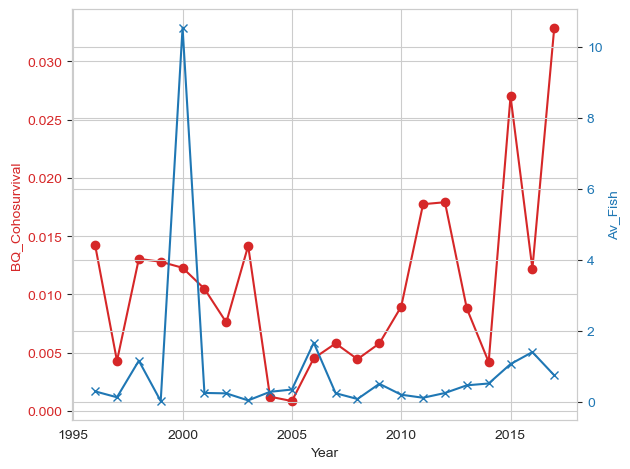

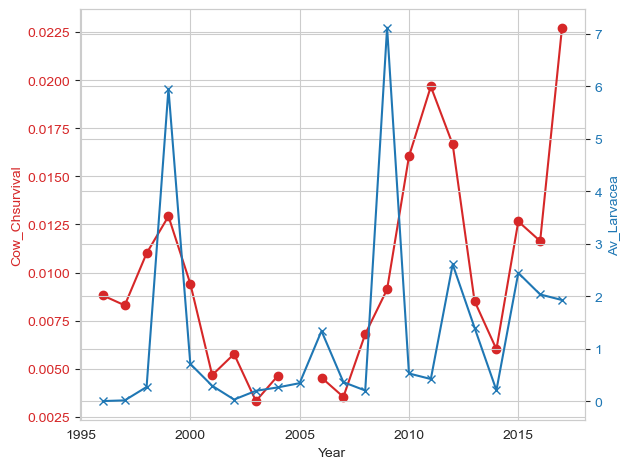

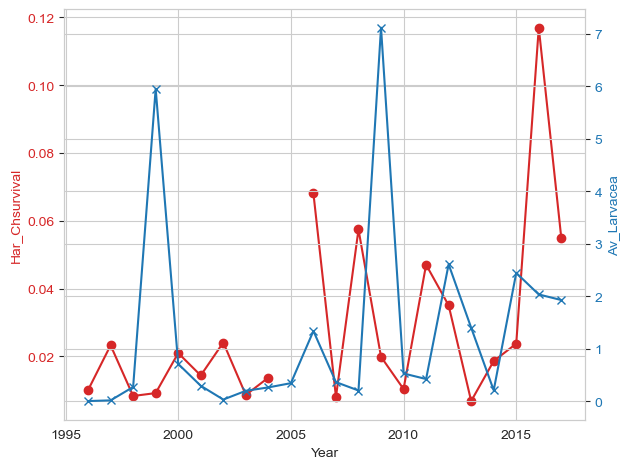

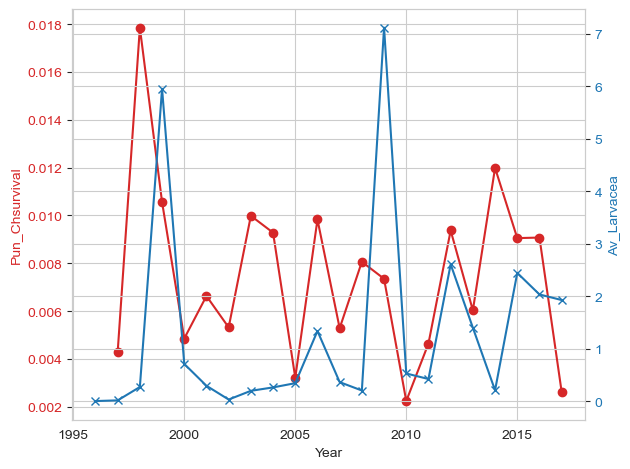

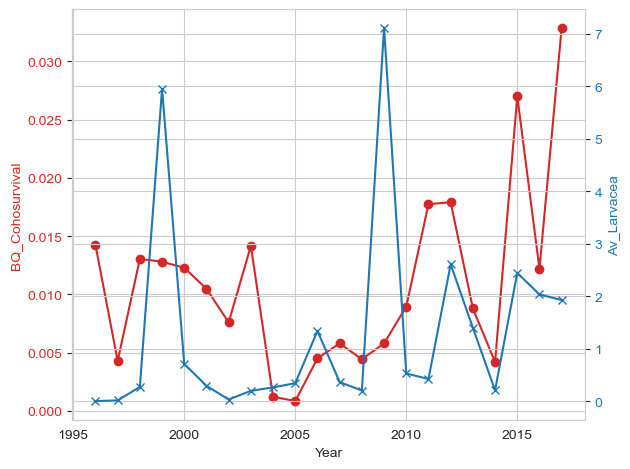

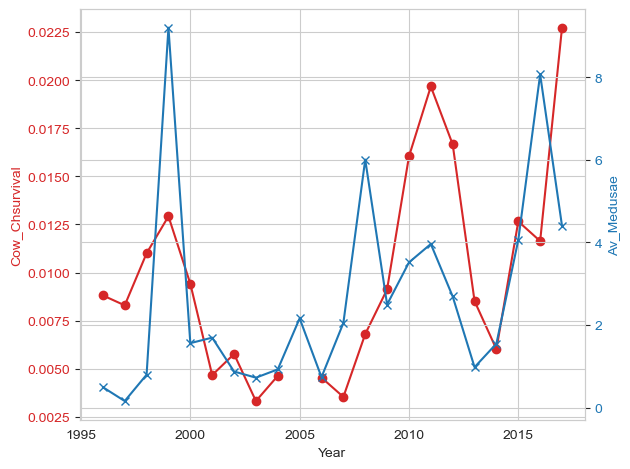

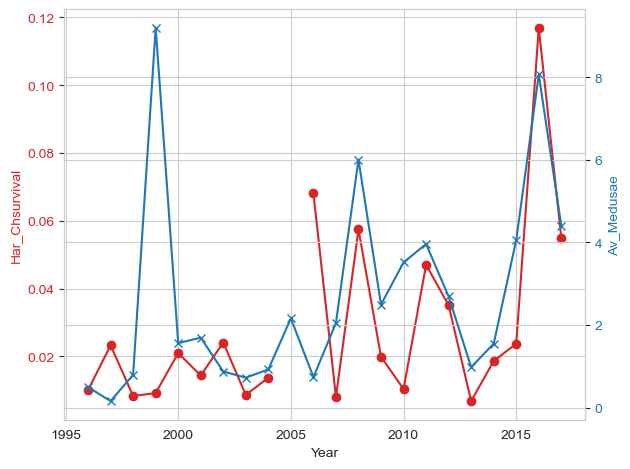

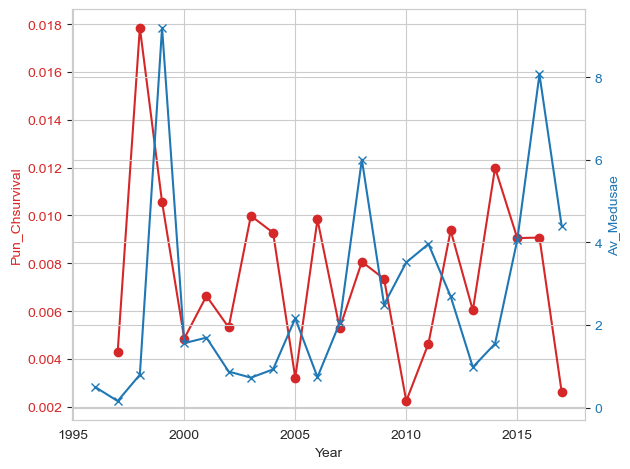

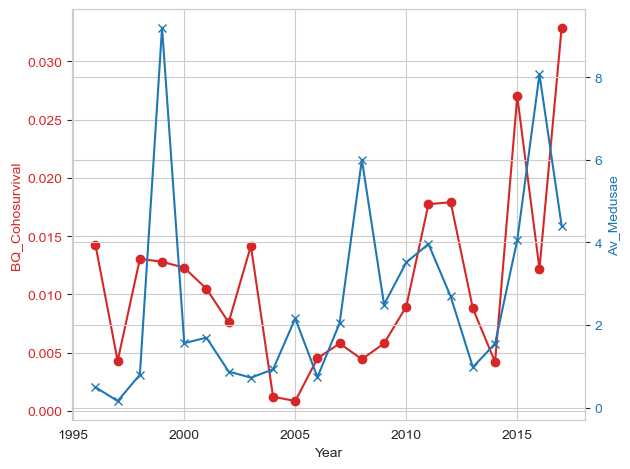

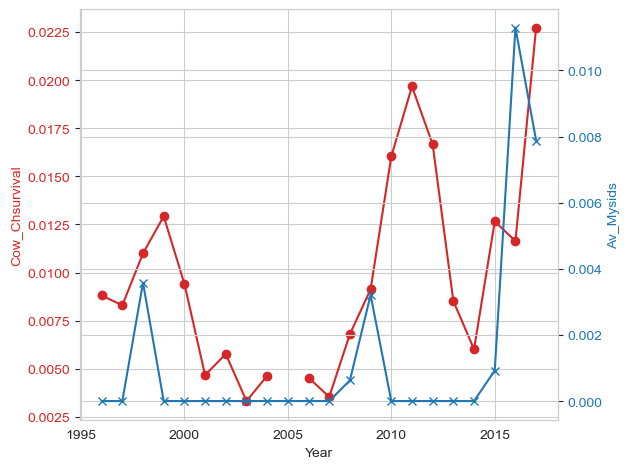

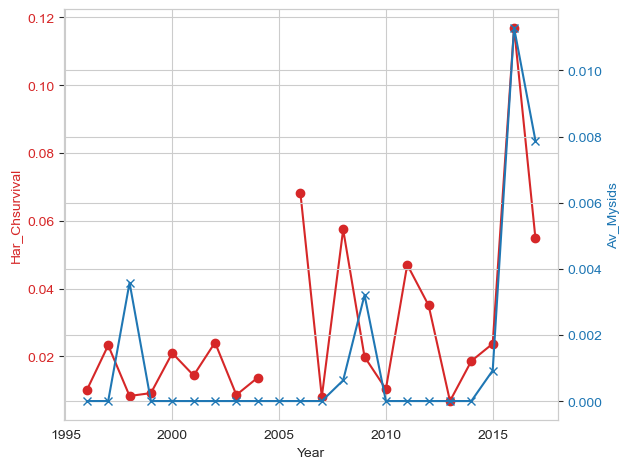

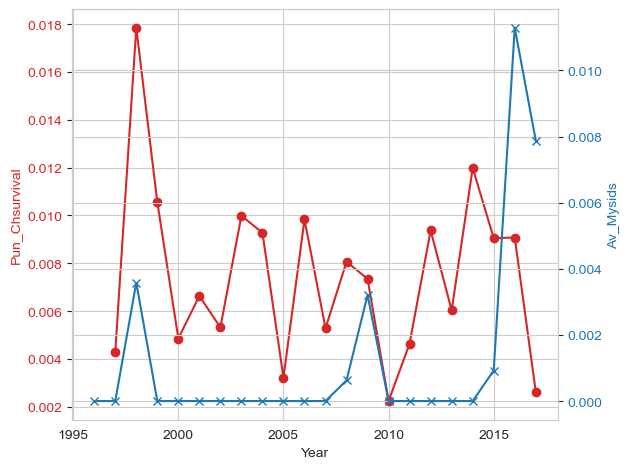

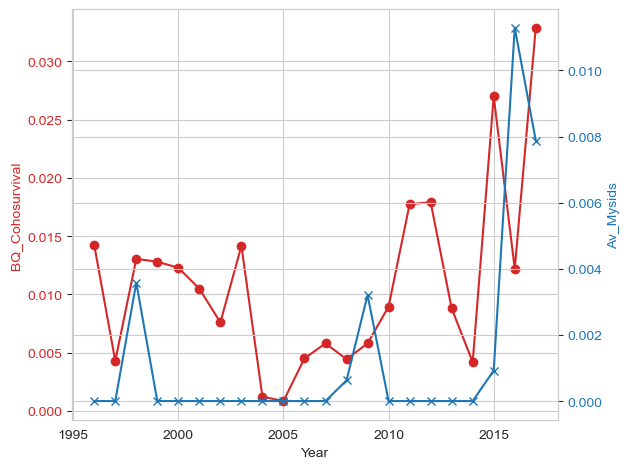

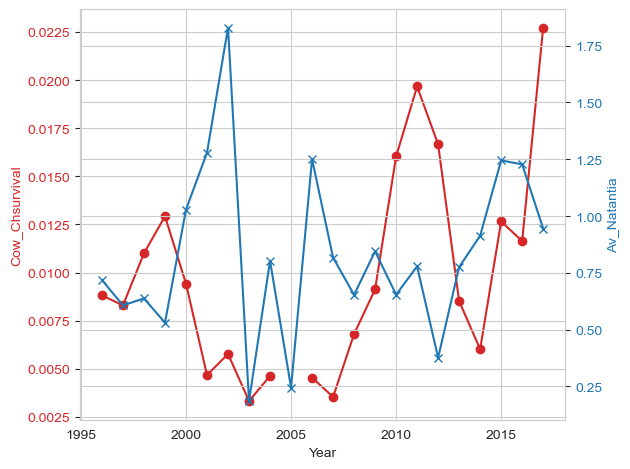

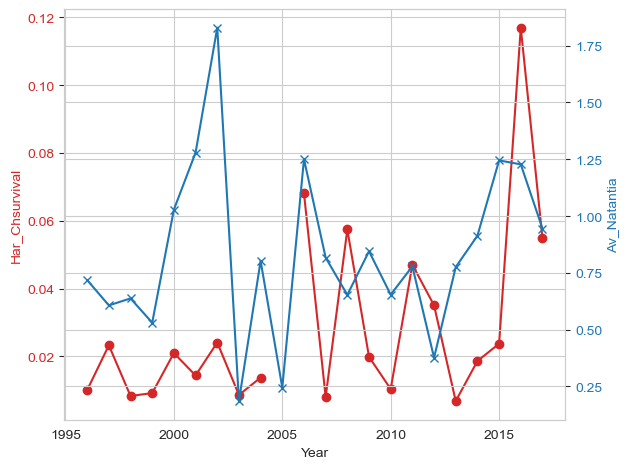

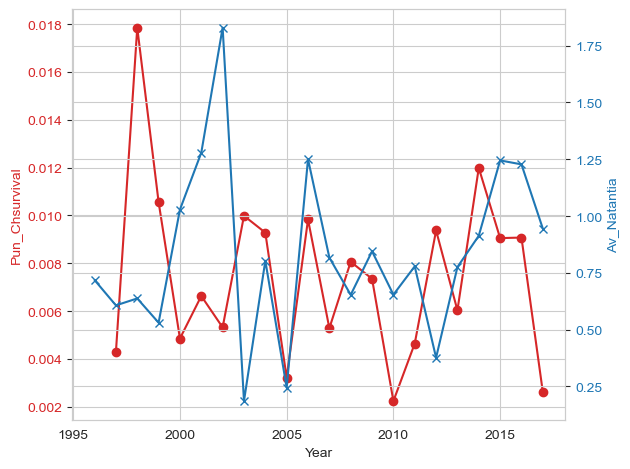

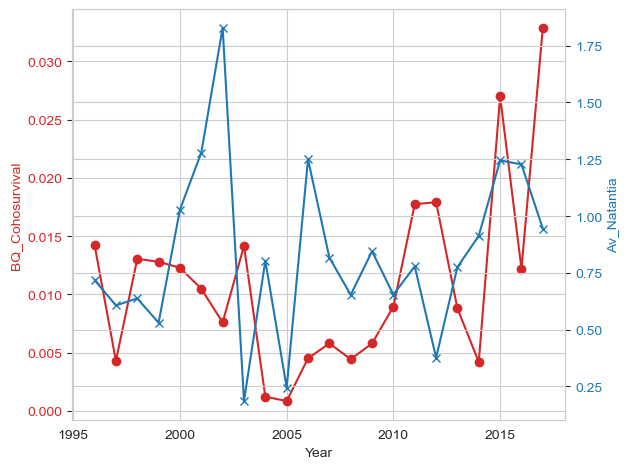

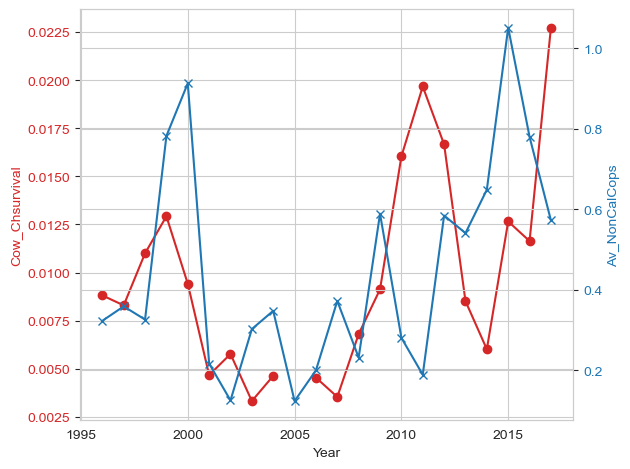

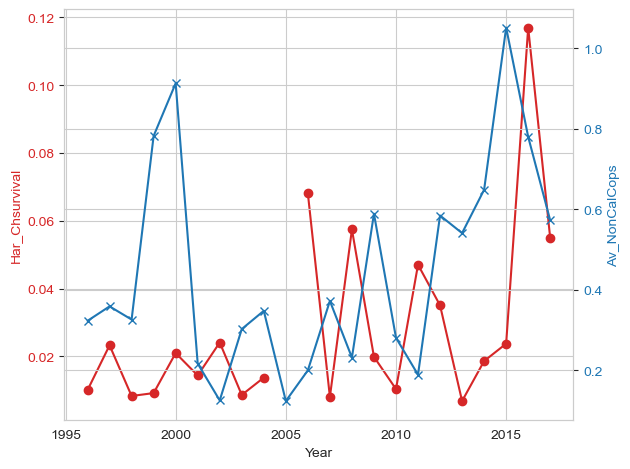

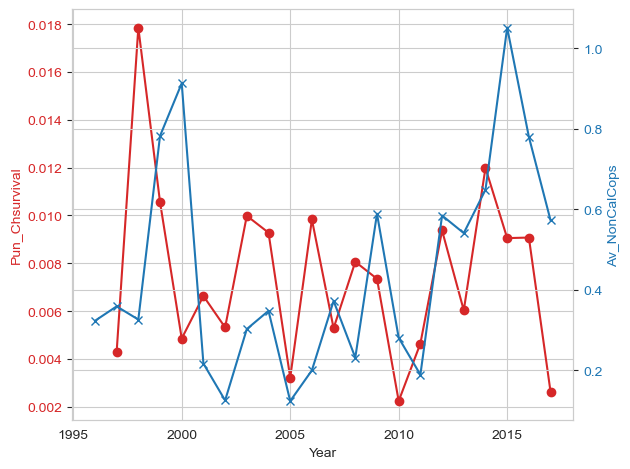

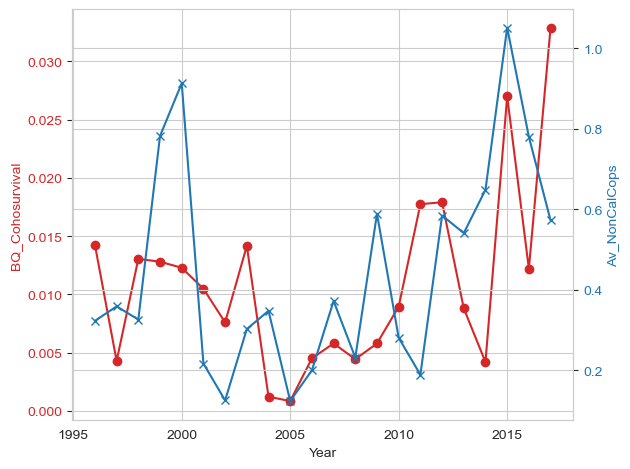

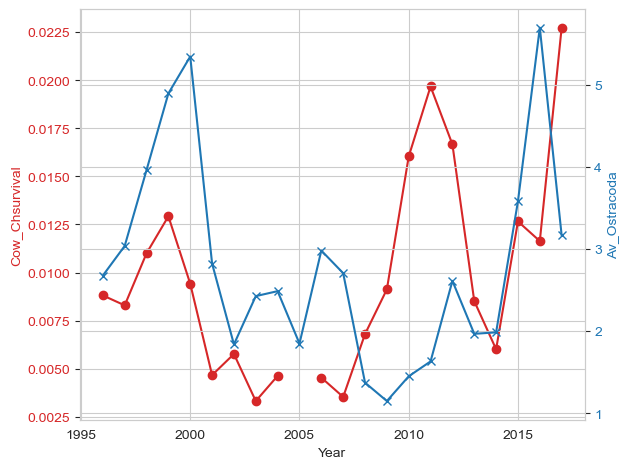

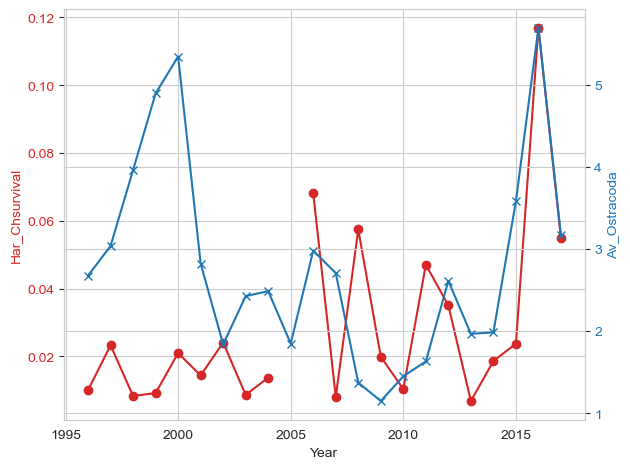

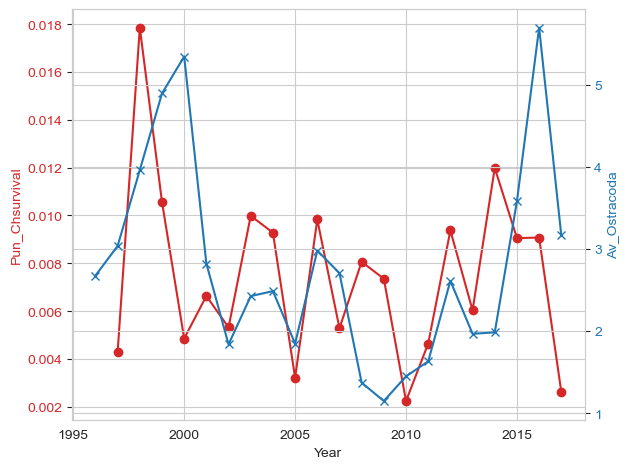

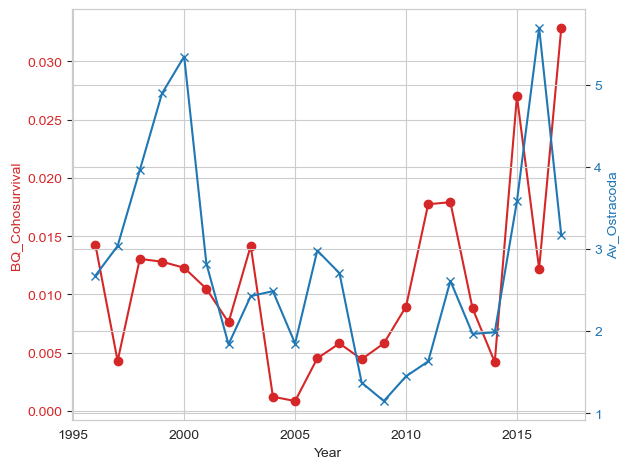

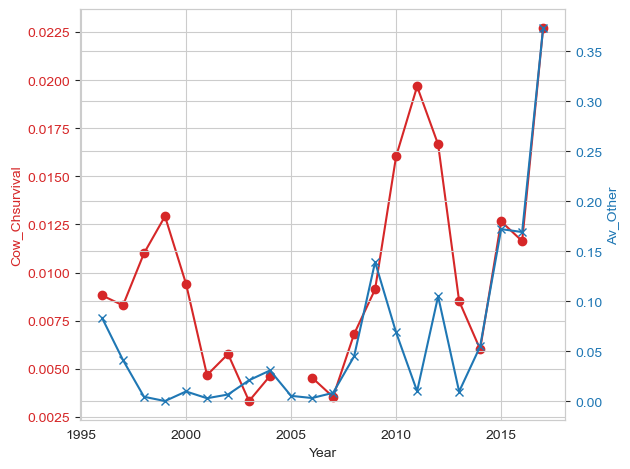

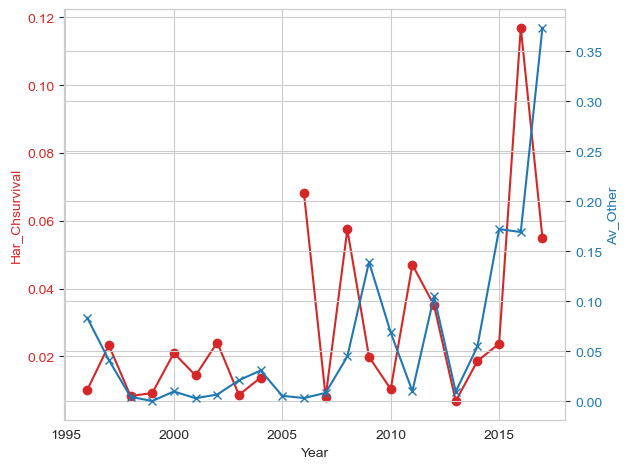

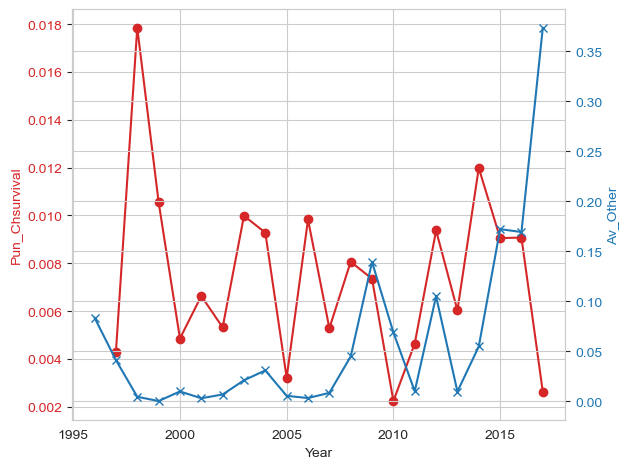

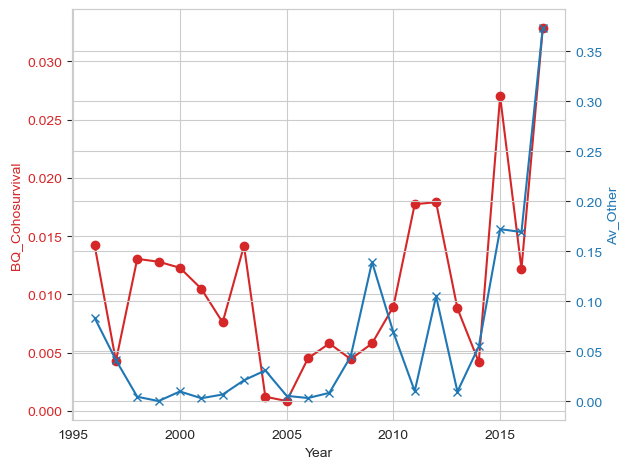

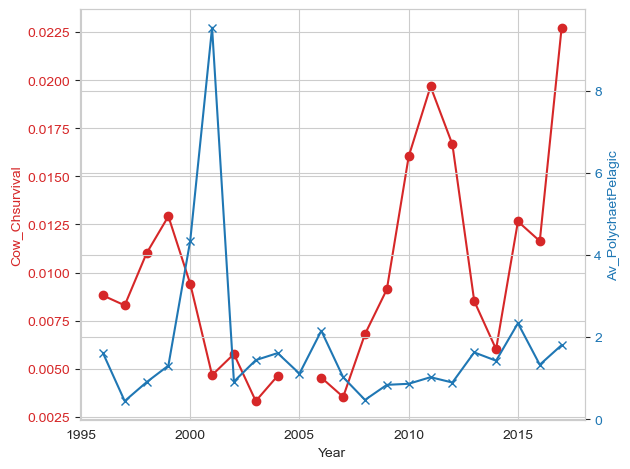

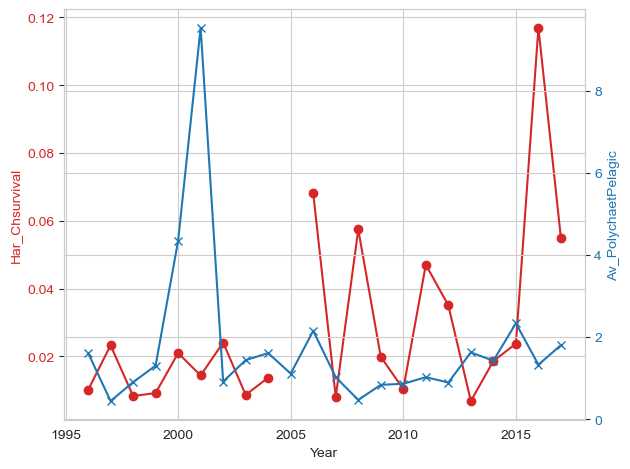

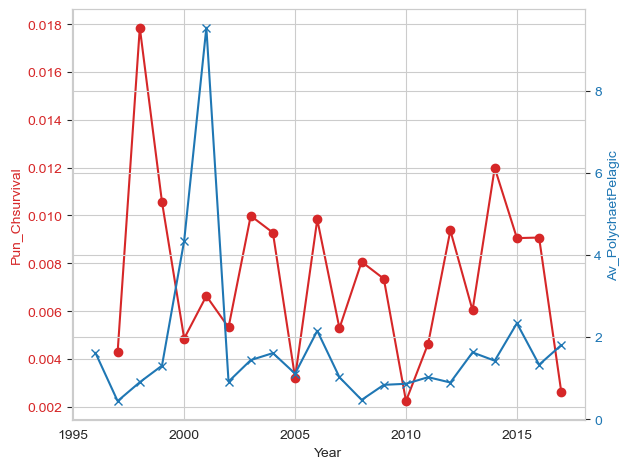

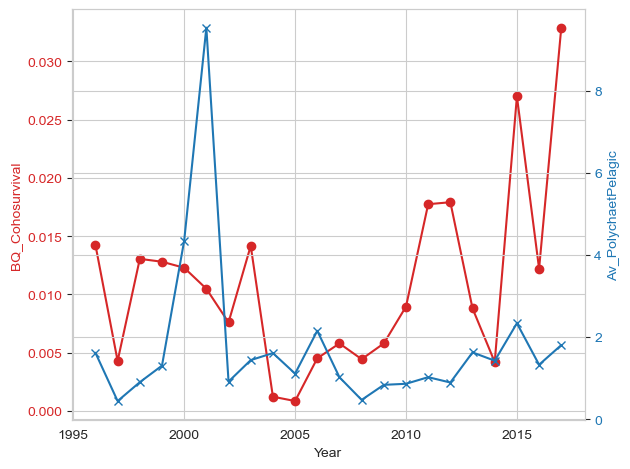

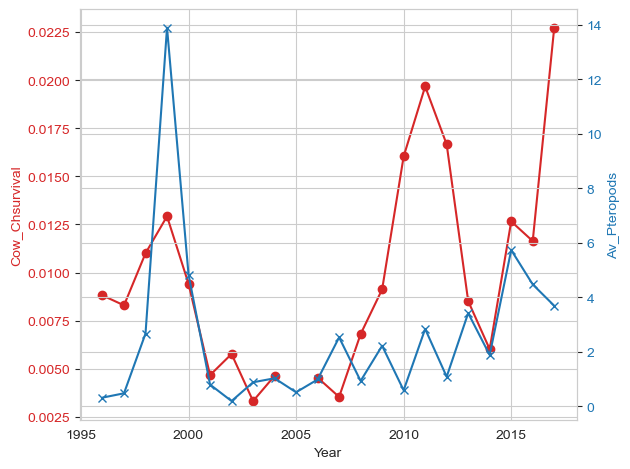

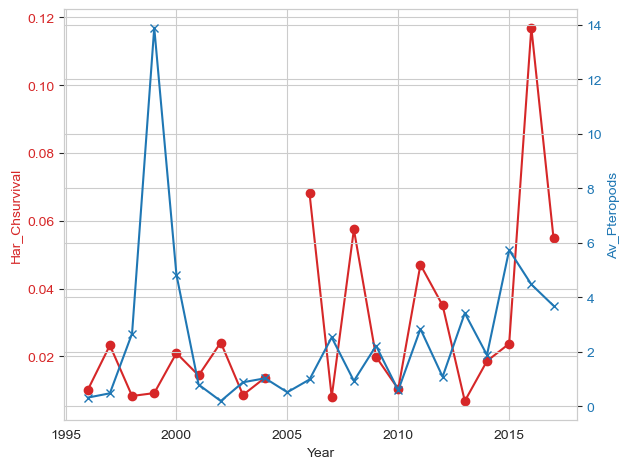

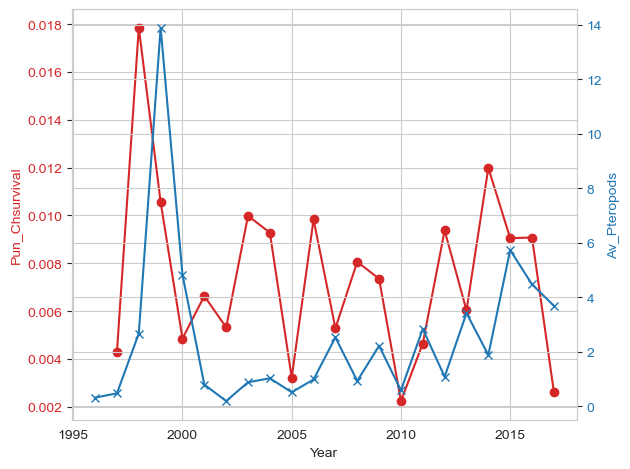

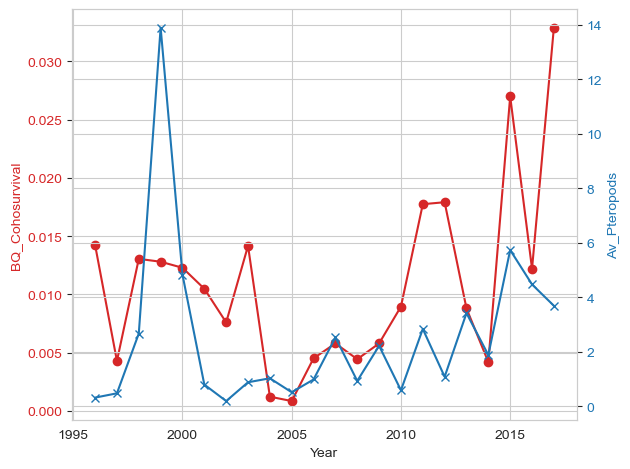

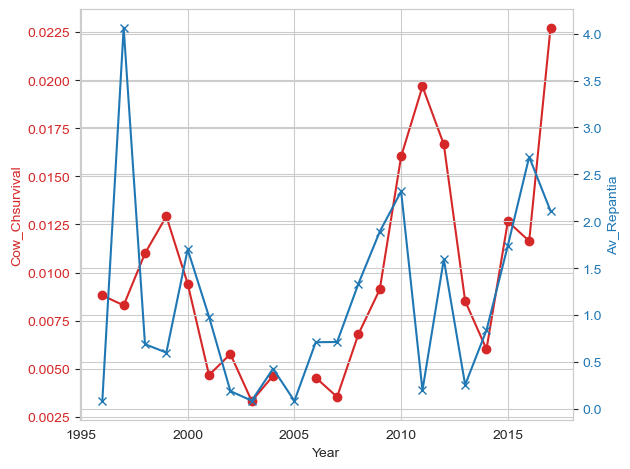

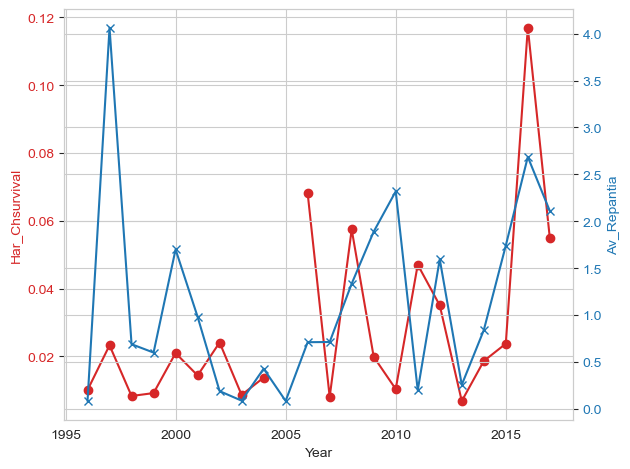

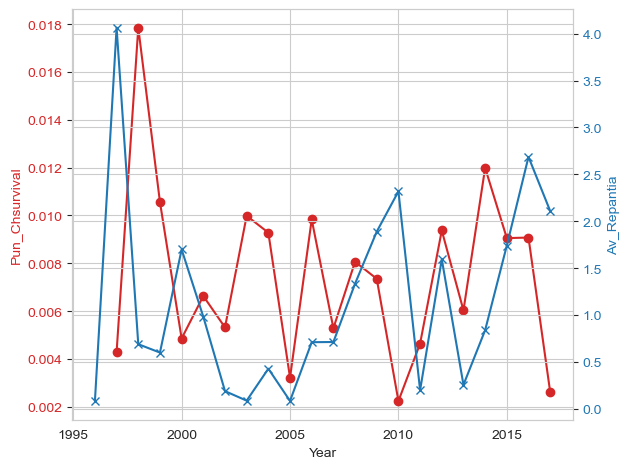

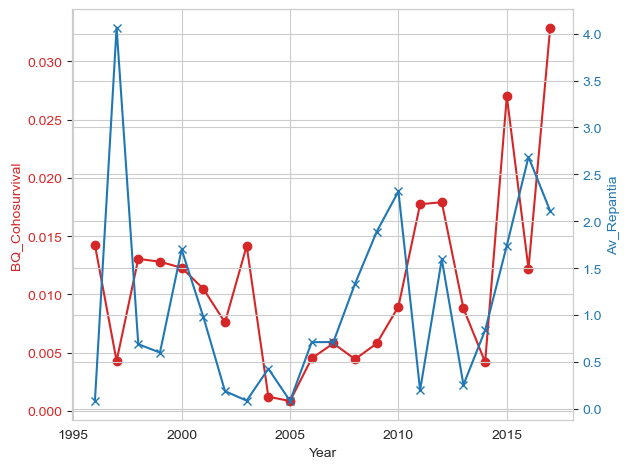

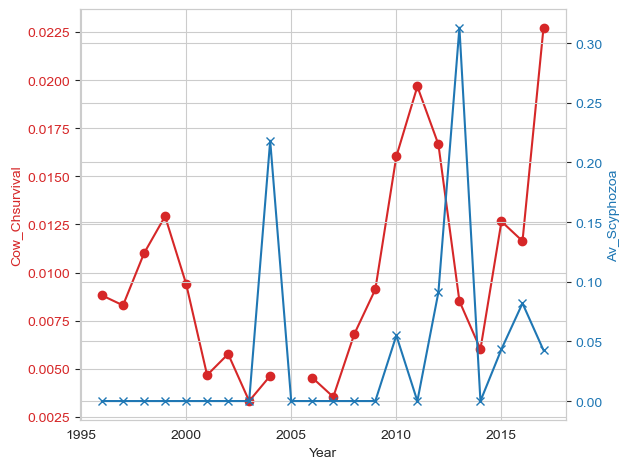

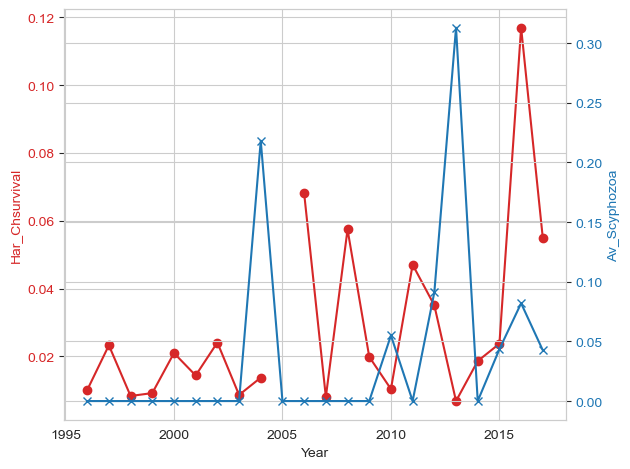

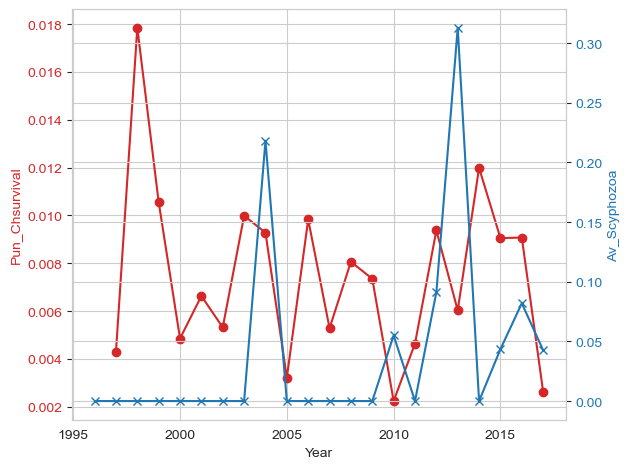

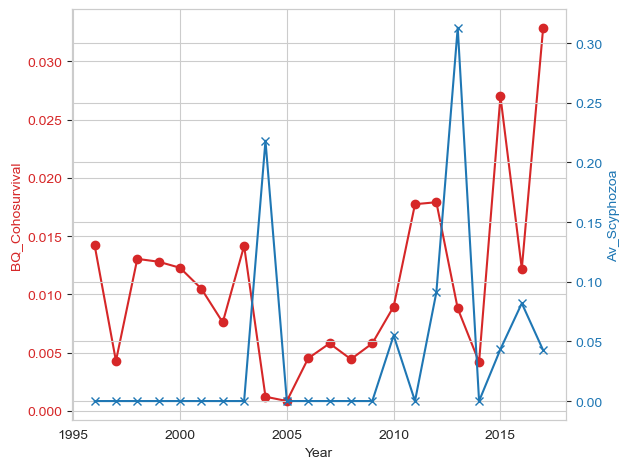

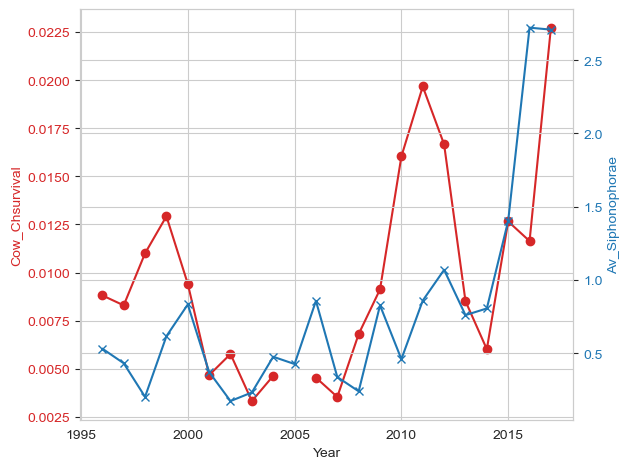

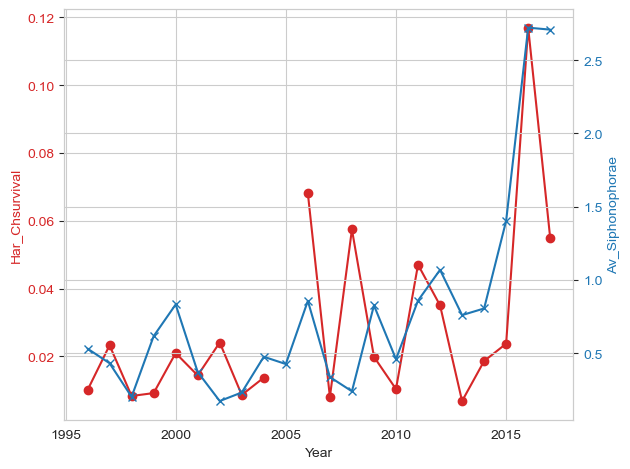

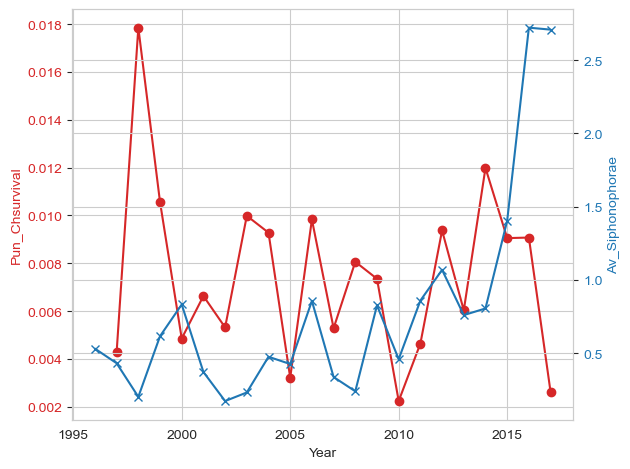

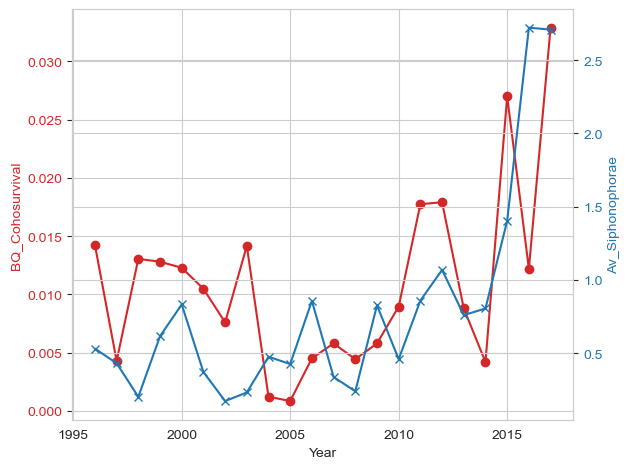

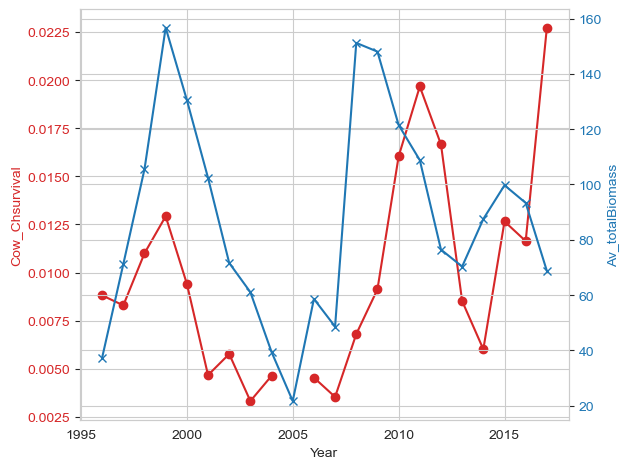

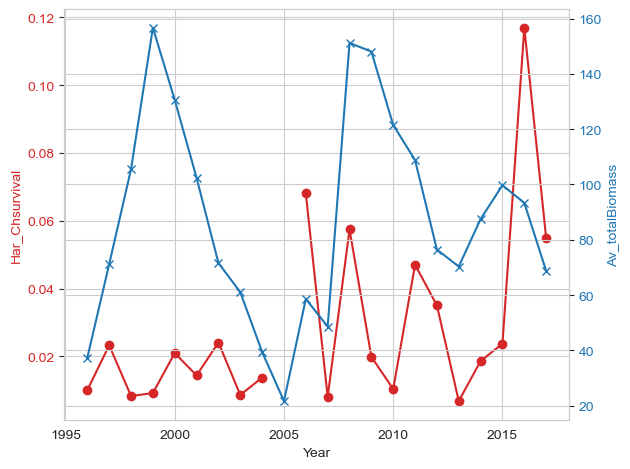

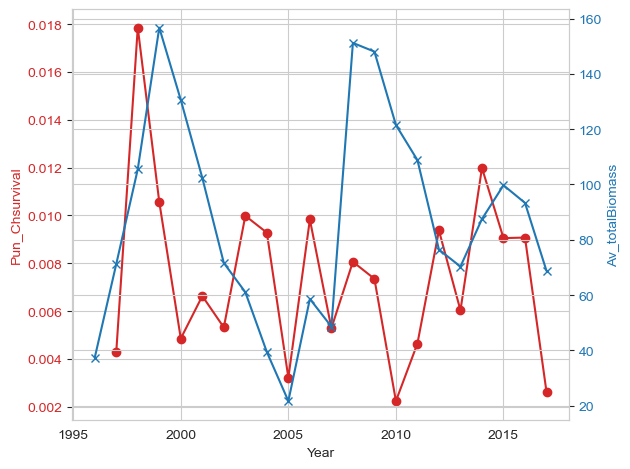

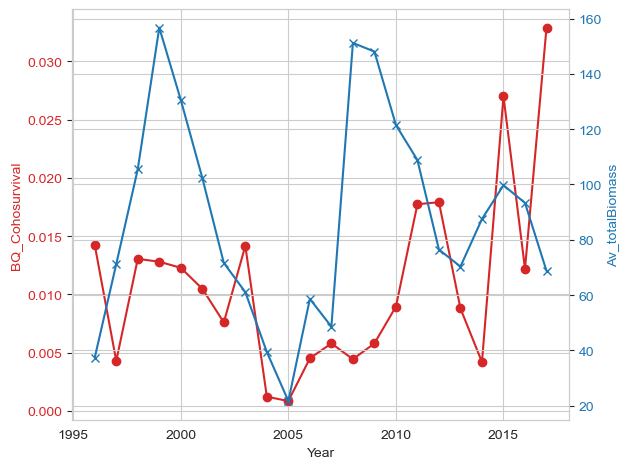

In [13]:
plotAll_withDiff_y(plankBiomassMean)